**DATASETS**:

1. folder 'sales' *(consists of eight CSVs corresponding to sales database)*
2. orchestra.json
3. orchestra.xml
4. sms.txt

In [3]:
import numpy as np
import pandas as pd
import sklearn
import json
import nltk
nltk.download('punkt')
nltk.download('stopwords')
#import remaining libraries here

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\namee\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\namee\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
import pyspark
from pyspark.context import SparkContext

In [5]:
#comment for first run
#sc.stop()

In [6]:
#you can modify configuration values
conf = pyspark.SparkConf().setAppName("App")
conf = (
         conf.setMaster('local')
        .set('spark.driver.memory', '8G')
        .set('spark.driver.cores', '8')
        .set('spark.python.worker.memory', '4G')
        .set('spark.worker.cores', '2')
        .set('spark.workerEnv.SPARK_WORKER_INSTANCES', '4')
        .set('spark.executor.instances', '8')
       )

sc = pyspark.SparkContext(conf=conf)

In [7]:
from xml.dom import minidom
import json

In [1]:
print("Enter Path of dataset csv  : ")
path_csv=input()

Enter Path of dataset csv  : 
Give path


In [9]:
calendar=pd.read_csv(path_csv+'calendar.csv')

In [2]:
print("Enter Path of dataset (except sales csv)  : ")
path=input()

Enter Path of dataset (except sales csv)  : 
Give Path


In [11]:
#import CSVs (eight) here 
calendar = pd.read_csv(path_csv+'calendar.csv') 
customers=pd.read_excel(path_csv+'customers.xlsx') 
order_returns=pd.read_csv(path_csv+'order_returns.csv') 
product_categories=pd.read_csv(path_csv+'product_categories.csv') 
product_subcategories=pd.read_csv(path_csv+'product_subcategories.csv') 
products=pd.read_csv(path_csv+'products.csv') 
sales=pd.read_csv(path_csv+'sales.csv') 
territories=pd.read_csv(path_csv+'territories.csv') 

#import JSONs (one) here
import json
 
# Opening JSON file
import json
f = open(path+'orchestra.json',encoding='UTF-8')
data = json.load(f)
f.close()

##highly nested json, this will be complicated



#import XMLs (one) here
orchestra_xml = minidom.parse(path+'orchestra.xml')



#import TXT (one) here
sms=[]
with open(path+'sms.txt') as f:
    lines = f.readlines()
    sms.append(lines)

**PROBLEM 1**: Fetch the product(s) - with product description consisting of "Universal fit, well-vented" and meet the condition c1

------
condition c1 - product had been ordered more than five times within a month "continously" over months

continously means "month after month" this condition c1 had been met

Eg. IF (in jan 2016 that particular product had been ordered more than five times, in feb 2016 too, in mar 2016 too, however, in apr 2016 this product had not been ordered more than five times, no matter again in may 2016 it had been again ordered more than five times) --- condition c1 stands failed 

In [12]:
products.head()

,ProductKey,ProductSubcategoryKey,ProductSKU,ProductName,ModelName,ProductDescription,ProductColor,ProductSize,ProductStyle,ProductCost,ProductPrice
0,214,31,HL-U509-R,"Sport-100 Helmet, Red",Sport-100,"Universal fit, well-vented, lightweight , snap...",Red,0,0,13.0863,34.9900
1,215,31,HL-U509,"Sport-100 Helmet, Black",Sport-100,"Universal fit, well-vented, lightweight , snap...",Black,0,0,12.0278,33.6442
2,218,23,SO-B909-M,"Mountain Bike Socks, M",Mountain Bike Socks,Combination of natural and synthetic fibers st...,White,M,U,3.3963,9.5000
3,219,23,SO-B909-L,"Mountain Bike Socks, L",Mountain Bike Socks,Combination of natural and synthetic fibers st...,White,L,U,3.3963,9.5000
4,220,31,HL-U509-B,"Sport-100 Helmet, Blue",Sport-100,"Universal fit, well-vented, lightweight , snap...",Blue,0,0,12.0278,33.6442


In [13]:
sales.head()

,OrderDate,StockDate,OrderNumber,ProductKey,CustomerKey,TerritoryKey,OrderLineItem,OrderQuantity
0,1/1/2015,9/21/2001,SO45080,332,14657,1,1,1
1,1/1/2015,12/5/2001,SO45079,312,29255,4,1,1
2,1/1/2015,10/29/2001,SO45082,350,11455,9,1,1
3,1/1/2015,11/16/2001,SO45081,338,26782,6,1,1
4,1/2/2015,12/15/2001,SO45083,312,14947,10,1,1


In [14]:
product_list=[]
product_desc_list=[]

orderdate = sales["OrderDate"].str.split("/", n = 2, expand = True)

sales["Day"]= orderdate[1]
sales["Month"]=orderdate[0]
sales["Year"]=orderdate[2]


In [15]:
sales.dtypes

OrderDate        object
StockDate        object
OrderNumber      object
ProductKey        int64
CustomerKey       int64
TerritoryKey      int64
OrderLineItem     int64
OrderQuantity     int64
Day              object
Month            object
Year             object
dtype: object

In [16]:
sales['Day']=sales['Day'].astype(str).astype(int)
sales['Month']=sales['Month'].astype(str).astype(int)
sales['Year']=sales['Year'].astype(str).astype(int)


In [17]:
sales.dtypes

OrderDate        object
StockDate        object
OrderNumber      object
ProductKey        int64
CustomerKey       int64
TerritoryKey      int64
OrderLineItem     int64
OrderQuantity     int64
Day               int32
Month             int32
Year              int32
dtype: object

In [18]:
sales['Year'].nunique()

3

In [19]:
### taking time because of O(N^2) complexity, couldve done it in O(N) but couldn't due to time boundation.
for i in range(len(products)) :
    count=-1
    count2=0
    temp=set()
    count_temp=-1

    for j in range(len(sales)):
        
        


        if (products.loc[i,"ProductKey"])==(sales.loc[j,"ProductKey"]):
            if(count_temp==-1):
                month=sales.loc[j,"Month"]
                year=sales.loc[j,"Year"]
                count_temp=0
           
                
            
            string=str(sales.loc[j,"Month"])+"-"+str(sales.loc[j,"Year"])
            temp.add(string)     
            #if month equals current month increase count
            if (sales.loc[j,"Month"]==month and sales.loc[j,"Year"]==year):
                
                count=count+1
                if count==6:
                
                    if(month<12):
                        month=month+1
                        
                        
                    elif(month==12):
                        month=1
                        year=year+1
                    count2=count2+1
            
                    count=0
            
            
    print(count2,len(temp))
    if (count2==len(temp) and count2!=0):
        print(count2)
        product_list.append(products.loc[i,"ProductKey"])
        product_desc_list.append(products.loc[i,"ProductDescription"])
        

12 12
12
12 12
12
0 0
0 0
12 12
12
12 12
12
0 12
0 12
12 12
12
12 12
12
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
6 6
6
6 6
6
6 6
6
6 6
6
6 6
6
0 0
0 0
0 0
0 0
0 0
0 18
0 15
0 18
0 17
0 17
0 18
0 18
0 18
0 17
0 17
0 16
0 18
1 6
0 6
0 6
0 5
0 6
1 6
0 6
0 6
0 24
24 24
24
0 24
2 24
2 24
24 24
24
0 0
0 0
0 0
0 0
10 12
12 12
12
12 12
12
7 24
23 24
4 24
24 24
24
4 24
0 24
0 24
0 24
0 24
0 23
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
12 12
12
0 12
12 12
12
0 0
0 0
0 0
0 12
12 12
12
0 12
0 12
0 12
0 12
12 12
12
12 12
12
12 12
12
12 12
12
0 12
0 12
12 12
12
12 12
12
12 12
12
0 12
12 12
12
12 12
12
12 12
12
12 12
12
12 12
12
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0

In [20]:
product_c1 = pd.DataFrame(
    {'ProductKey': product_list,
     'ProductDescription': product_desc_list
    })

In [21]:
product_c1

,ProductKey,ProductDescription
0,214,"Universal fit, well-vented, lightweight , snap..."
1,215,"Universal fit, well-vented, lightweight , snap..."
2,220,"Universal fit, well-vented, lightweight , snap..."
3,223,Traditional style with a flip-up brim; one-siz...
4,232,Unisex long-sleeve AWC logo microfiber cycling...
5,235,Unisex long-sleeve AWC logo microfiber cycling...
6,310,This bike is ridden by race winners. Developed...
7,311,This bike is ridden by race winners. Developed...
8,312,This bike is ridden by race winners. Developed...
9,313,This bike is ridden by race winners. Developed...


In [22]:
product_c1_contains_string = product_c1[product_c1['ProductDescription'].str.contains('Universal fit, well-vented')]


### These are the Products that contains Universal fit,well-vented in their description and 
### sell continously over all the months with atleast 6 orders per month

In [23]:
product_c1_contains_string

,ProductKey,ProductDescription
0,214,"Universal fit, well-vented, lightweight , snap..."
1,215,"Universal fit, well-vented, lightweight , snap..."
2,220,"Universal fit, well-vented, lightweight , snap..."


**PROBLEM 2**: Fetch total orders made by married male customers belonging to Central America occupied in a clerical job

In [24]:
OrderNumber=[]
OrderDate=[]
CustomerKey=[]
Territory=[]

In [25]:
required_customer=[]

In [26]:
for i in range(len(customers)):
    if(customers.loc[i,"Gender"])=='M' and customers.loc[i,"Occupation"]=="Clerical" and customers.loc[i,"MaritalStatus"]=="M":
        required_customer.append(customers.loc[i,"CustomerKey"])

In [27]:
required_customer

[11027,
 11029,
 11039,
 11044,
 11336,
 11338,
 11341,
 11342,
 11355,
 11367,
 11375,
 11377,
 11388,
 11485,
 11514,
 11518,
 11523,
 11529,
 11530,
 11544,
 11545,
 11569,
 11942,
 12029,
 12216,
 12224,
 12239,
 12249,
 12257,
 12268,
 12269,
 12271,
 12272,
 12273,
 12279,
 12425,
 12426,
 12428,
 12429,
 12431,
 12432,
 12433,
 12434,
 12436,
 12437,
 12440,
 12441,
 12443,
 12445,
 12447,
 12462,
 12463,
 12468,
 12472,
 12507,
 12540,
 12541,
 12542,
 12547,
 12551,
 12552,
 12554,
 12555,
 12556,
 12557,
 12559,
 12563,
 12564,
 12566,
 12596,
 12600,
 12601,
 12602,
 12604,
 12606,
 12608,
 12613,
 12620,
 12621,
 12743,
 12767,
 12768,
 12769,
 12770,
 12775,
 12777,
 12779,
 12780,
 12783,
 12784,
 12785,
 12786,
 12799,
 12805,
 12806,
 12808,
 12810,
 12813,
 12821,
 13020,
 13022,
 13024,
 13025,
 13047,
 13156,
 13496,
 13509,
 13516,
 13531,
 13545,
 13546,
 13551,
 13692,
 13707,
 13724,
 13725,
 13726,
 13729,
 13730,
 13735,
 13736,
 13737,
 13738,
 13739,
 13742,


In [28]:

for j in range(len(sales)):
    if(sales.loc[j,"CustomerKey"]) in required_customer:
        if(sales.loc[j,"TerritoryKey"]==3):
            OrderNumber.append(sales.loc[j,"OrderNumber"])
            OrderDate.append(sales.loc[j,"OrderDate"]) 
            CustomerKey.append(sales.loc[j,"CustomerKey"])
        
                        
                        
                        
                    
                    

In [29]:
OrderNumber

[]

### There are no Orders that match this criteria, TerritoryKey ==3 as , Central Region in North America has Key 3 in Terriotory csv file.
### Required Customer list is customer IDs of those customer that does'nt have territory Key boundry to them(involves all territory)

### Let me Fetch total orders made by married male customers belonging to All Region occupied in a clerical job, then we will check if territory 3 is there, doing just to double check

In [30]:
for j in range(len(sales)):
    if(sales.loc[j,"CustomerKey"]) in required_customer:
        OrderNumber.append(sales.loc[j,"OrderNumber"])
        OrderDate.append(sales.loc[j,"OrderDate"]) 
        CustomerKey.append(sales.loc[j,"CustomerKey"])
        Territory.append(sales.loc[j,"TerritoryKey"])

In [31]:
customer_orders = pd.DataFrame(
    {'OrderNumber': OrderNumber,
     'OrderDate': OrderDate,
     'CustomerKey':CustomerKey,
     'Territory':Territory
    })

In [32]:
customer_orders

,OrderNumber,OrderDate,CustomerKey,Territory
0,SO45092,1/3/2015,18899,9
1,SO45087,1/3/2015,11388,10
2,SO45100,1/5/2015,19428,8
3,SO45139,1/12/2015,12468,7
4,SO45155,1/14/2015,18900,9
...,...,...,...,...
2279,SO74127,6/30/2017,13735,1
2280,SO74127,6/30/2017,13735,1
2281,SO74127,6/30/2017,13735,1
2282,SO74133,6/30/2017,13765,10


In [33]:
customer_orders = customer_orders.sort_values(['CustomerKey'])

In [34]:
customer_orders

,OrderNumber,OrderDate,CustomerKey,Territory
796,SO58536,11/24/2016,11027,9
794,SO58536,11/24/2016,11027,9
1821,SO69088,4/26/2017,11027,9
1820,SO69088,4/26/2017,11027,9
1819,SO69088,4/26/2017,11027,9
...,...,...,...,...
738,SO57818,11/12/2016,29438,8
1488,SO65680,3/6/2017,29453,9
163,SO49617,3/8/2016,29479,7
170,SO49746,3/22/2016,29482,7


In [35]:
customer_orders.Territory.unique()

array([ 9,  7,  8, 10,  1,  6,  4,  2], dtype=int64)

### as you can see above , no Territory = 3 there

**PROBLEM 3**: List customers who ordered same product more than once in a month 

##### Here i will ignore the quantity of items ordered at a single instance, that'll be straightforward
##### and find if the customer ordered it multiple time in a month

In [36]:

customer_set=set()
customer_list=[]

In [37]:
for i in range(len(customers)):  
    customer_list.append(customers.loc[i,"CustomerKey"])

In [38]:
sales_data=sales.sort_values(['CustomerKey','ProductKey','Month','Year'])

In [39]:
sales_data

,OrderDate,StockDate,OrderNumber,ProductKey,CustomerKey,TerritoryKey,OrderLineItem,OrderQuantity,Day,Month,Year
17800,11/4/2016,8/17/2003,SO57418,214,11000,9,4,1,4,11,2016
5271,7/22/2016,4/12/2003,SO51522,352,11000,9,1,1,22,7,2016
5270,7/22/2016,5/2/2003,SO51522,485,11000,9,2,2,22,7,2016
17801,11/4/2016,9/6/2003,SO57418,488,11000,9,5,1,4,11,2016
17798,11/4/2016,8/11/2003,SO57418,530,11000,9,3,2,4,11,2016
...,...,...,...,...,...,...,...,...,...,...,...
29095,1/18/2017,10/26/2003,SO62341,479,29480,10,2,2,18,1,2017
29097,1/18/2017,11/25/2003,SO62341,562,29480,10,1,1,18,1,2017
262,2/13/2015,11/15/2001,SO45427,349,29481,8,1,1,13,2,2015
3330,3/22/2016,12/10/2002,SO49746,358,29482,7,1,1,22,3,2016


In [40]:
for i in range(len(sales_data)):
    if(i>0) and i<56045:
        temp_key=sales_data.loc[i,"ProductKey"]
        temp_customer=sales_data.loc[i,"CustomerKey"]
        temp_month=sales_data.loc[i,"Month"]
        temp_year=sales_data.loc[i,"Year"]
        
        if(temp_key==sales_data.loc[i+1,"ProductKey"]):
            if(temp_customer==sales_data.loc[i+1,"CustomerKey"]):
                if(temp_month==sales_data.loc[i+1,"Month"]):
                    if(temp_year==sales_data.loc[i+1,"Year"]):
                        customer_set.add(sales_data.loc[i+1,"CustomerKey"])
        
        if(temp_key==sales_data.loc[i-1,"ProductKey"]):
            if(temp_customer==sales_data.loc[i-1,"CustomerKey"]):
                if(temp_month==sales_data.loc[i-1,"Month"]):
                    if(temp_year==sales_data.loc[i-1,"Year"]):
                        customer_set.add(sales_data.loc[i-1,"CustomerKey"])
        
                
    

In [41]:
customer_set

{11276, 11566}

### There are 2 customer with customerID 11276 and 11566 who ordered same product in single month

**PROBLEM 4**: Supose Today is May 23, 2016. Display month-to-date count of returned orders <br>
NOTE: Month-to-date is a period starting at the beginning of the current month and ending at the current date. If today's date is May 23, 2016, then month-to-date shall be period between inclusive of May 01,2016 and May 23,2016

In [42]:
## let us assume a current date, lets hardcode it to 05/23/2016 as given in the question(MM/DD/YYYY)

In [43]:
today ='05/23/2016'
todaydate = today.split("/")

In [44]:
MM=int(todaydate[0])
DD=int(todaydate[1])
YY=int(todaydate[2])

In [45]:
returndate = order_returns["ReturnDate"].str.split("/", n = 2, expand = True)

order_returns["Day"]= returndate[1]
order_returns["Month"]=returndate[0]
order_returns["Year"]=returndate[2]


In [46]:
order_returns['Day']=order_returns['Day'].astype(str).astype(int)
order_returns['Month']=order_returns['Month'].astype(str).astype(int)
order_returns['Year']=order_returns['Year'].astype(str).astype(int)


In [47]:
order_returns

,ReturnDate,TerritoryKey,ProductKey,ReturnQuantity,Day,Month,Year
0,1/18/2015,9,312,1,18,1,2015
1,1/18/2015,10,310,1,18,1,2015
2,1/21/2015,8,346,1,21,1,2015
3,1/22/2015,4,311,1,22,1,2015
4,2/2/2015,6,312,1,2,2,2015
...,...,...,...,...,...,...,...
1804,6/30/2017,6,491,1,30,6,2017
1805,6/30/2017,8,477,1,30,6,2017
1806,6/30/2017,9,477,1,30,6,2017
1807,6/30/2017,10,223,1,30,6,2017


In [48]:
product_key=[]

In [49]:
order_returns=order_returns.sort_values(['Year','Month','Day'],ascending=True)

In [50]:
order_returns

,ReturnDate,TerritoryKey,ProductKey,ReturnQuantity,Day,Month,Year
0,1/18/2015,9,312,1,18,1,2015
1,1/18/2015,10,310,1,18,1,2015
2,1/21/2015,8,346,1,21,1,2015
3,1/22/2015,4,311,1,22,1,2015
4,2/2/2015,6,312,1,2,2,2015
...,...,...,...,...,...,...,...
1804,6/30/2017,6,491,1,30,6,2017
1805,6/30/2017,8,477,1,30,6,2017
1806,6/30/2017,9,477,1,30,6,2017
1807,6/30/2017,10,223,1,30,6,2017


In [51]:
for i in range(len(order_returns)):
    if(order_returns.loc[i,"Year"]==YY) and (order_returns.loc[i,"Month"]==MM):
        if(order_returns.loc[i,"Day"]<=DD):
            product_key.append(order_returns.loc[i,"ProductKey"])

In [52]:
product_key

[322, 352, 370, 352, 354, 371, 328]

In [53]:
len(product_key)

7

### these are the products that are returned from 1st May 2016 till 23 May 2016
### there are total 7 order returns and the product ID are 322,352,370,352,371,328

**PROBLEM 5**: Fetch the top selling model and it's sale value, for each subcategory

In [54]:
product_list_nested=[]

In [55]:
for j in range(1,38):
    product_list=[]
    for i in range(len(products)):
        if(products.loc[i,"ProductSubcategoryKey"]==j):
            product_list.append(products.loc[i,"ProductKey"])
    print(product_list)
    product_list_nested.append(product_list)
            
    
    
    

[344, 345, 346, 347, 348, 349, 350, 351, 352, 354, 356, 358, 360, 362, 364, 365, 366, 367, 587, 588, 589, 590, 591, 592, 593, 594, 595, 596, 597, 598, 599, 600]
[310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 322, 324, 326, 328, 330, 332, 334, 336, 338, 340, 342, 368, 369, 370, 371, 373, 375, 377, 379, 381, 383, 385, 387, 389, 580, 581, 582, 583, 584, 604, 605, 606]
[560, 561, 562, 563, 564, 565, 566, 567, 568, 569, 570, 571, 572, 573, 574, 575, 576, 577, 578, 579, 585, 586]
[397, 399, 401, 403, 405, 407, 553, 554]
[601, 602, 603]
[514, 555]
[559]
[556, 557, 558]
[501, 552]
[391, 392, 393]
[394, 395, 396]
[288, 291, 292, 293, 296, 299, 300, 301, 304, 307, 409, 426, 427, 428, 511, 512, 513, 524, 525, 526, 527, 531, 532, 533, 534, 549, 550, 551]
[542, 543, 544, 545, 546, 547, 548]
[238, 241, 244, 247, 250, 253, 256, 259, 262, 264, 266, 268, 270, 272, 274, 275, 276, 277, 278, 279, 282, 285, 417, 429, 431, 433, 435, 437, 439, 441, 443]
[515, 516, 517, 518, 519, 520, 521, 522, 523]


In [56]:
product_list_nested

[[344,
  345,
  346,
  347,
  348,
  349,
  350,
  351,
  352,
  354,
  356,
  358,
  360,
  362,
  364,
  365,
  366,
  367,
  587,
  588,
  589,
  590,
  591,
  592,
  593,
  594,
  595,
  596,
  597,
  598,
  599,
  600],
 [310,
  311,
  312,
  313,
  314,
  315,
  316,
  317,
  318,
  319,
  320,
  322,
  324,
  326,
  328,
  330,
  332,
  334,
  336,
  338,
  340,
  342,
  368,
  369,
  370,
  371,
  373,
  375,
  377,
  379,
  381,
  383,
  385,
  387,
  389,
  580,
  581,
  582,
  583,
  584,
  604,
  605,
  606],
 [560,
  561,
  562,
  563,
  564,
  565,
  566,
  567,
  568,
  569,
  570,
  571,
  572,
  573,
  574,
  575,
  576,
  577,
  578,
  579,
  585,
  586],
 [397, 399, 401, 403, 405, 407, 553, 554],
 [601, 602, 603],
 [514, 555],
 [559],
 [556, 557, 558],
 [501, 552],
 [391, 392, 393],
 [394, 395, 396],
 [288,
  291,
  292,
  293,
  296,
  299,
  300,
  301,
  304,
  307,
  409,
  426,
  427,
  428,
  511,
  512,
  513,
  524,
  525,
  526,
  527,
  531,
  532,
  533,
 

In [57]:
final_product_list=[]

In [58]:
final_price=[]
final_product=[]

for i in product_list_nested:
    price=[]
    product_=[]
    for j in i:
        counter=0
        for k in range(len(sales)):
            if(j==sales.loc[k,"ProductKey"]):
                counter=counter+sales.loc[k,"OrderQuantity"]
        price.append(counter)
        product_.append(j)
    index1=price.index(max(price))
    final_price.append(max(price))
    final_product.append(product_[index1])

                
### taking time because of O(N^2) complexity, couldve done it in O(N) by first adding all elements in separate list
### or set and then comparing, would've taken less time.

In [59]:
final_price_list=[]
for i in range(len(final_price)):
    for j in range(len(products)):
        if(final_product[i]==products.loc[j,"ProductKey"]):
            final_price_list.append(products.loc[j,"ProductPrice"])
            
            

In [60]:
final_price_list

[2049.0982,
 539.99,
 2384.07,
 40.4909,
 53.99,
 106.5,
 20.24,
 175.49,
 121.46,
 148.22,
 34.2,
 1204.3248,
 40.49,
 1263.4598,
 27.12,
 1003.91,
 60.745,
 89.99,
 8.6442,
 23.5481,
 48.0673,
 69.99,
 8.99,
 74.99,
 63.5,
 120.0,
 159.0,
 4.99,
 7.95,
 21.98,
 34.99,
 54.99,
 13.99,
 25.0,
 125.0,
 19.99,
 2.29]

In [61]:
final_product

[362,
 606,
 573,
 397,
 601,
 514,
 559,
 556,
 501,
 391,
 394,
 288,
 542,
 238,
 515,
 492,
 410,
 459,
 223,
 464,
 232,
 476,
 481,
 456,
 472,
 483,
 486,
 477,
 484,
 485,
 214,
 487,
 450,
 447,
 446,
 448,
 480]

In [62]:
sales_final=[]
for i in final_product:
    for j in range(len(products)):
        if(i==products.loc[j,"ProductKey"]):
            sales_final.append(products.loc[j,"ProductPrice"])

In [63]:
list_categories=[]
for i in range(1,38):
    list_categories.append(i)
    

In [64]:
question5 = pd.DataFrame(
    {'ProductSubCategoryKey': list_categories,
     'Max_Sold_Product_ProductSubCategoryKey': final_product,
     'Sale Price':sales_final
    })

In [65]:
question5

,ProductSubCategoryKey,Max_Sold_Product_ProductSubCategoryKey,Sale Price
0,1,362,2049.0982
1,2,606,539.9900
2,3,573,2384.0700
3,4,397,40.4909
4,5,601,53.9900
5,6,514,106.5000
6,7,559,20.2400
7,8,556,175.4900
8,9,501,121.4600
9,10,391,148.2200


### Above shows max sold product key for each subcategory key along with its selling price

Refer & Use Orchestra.json to answer problem 6-8 below

**PROBLEM 6**: Display the instrument played by Lehmann Caroline 

In [66]:
data

{'programs': [{'id': '00646b9f-fec7-4ffb-9fb1-faae410bd9dc-0.1',
   'programID': '3853',
   'orchestra': 'New York Philharmonic',
   'season': '1842-43',
   'concerts': [{'eventType': 'Subscription Season',
     'Location': 'Manhattan, NY',
     'Venue': 'Apollo Rooms',
     'Date': '1842-12-07T05:00:00Z',
     'Time': '8:00PM'}],
   'works': [{'ID': '52446*',
     'composerName': 'Beethoven,  Ludwig  van',
     'workTitle': 'SYMPHONY NO. 5 IN C MINOR, OP.67',
     'conductorName': 'Hill, Ureli Corelli',
     'soloists': []},
    {'ID': '8834*4',
     'composerName': 'Weber,  Carl  Maria Von',
     'workTitle': 'OBERON',
     'movement': '"Ozean, du Ungeheuer" (Ocean, thou mighty monster), Reiza (Scene and Aria), Act II',
     'conductorName': 'Timm, Henry C.',
     'soloists': [{'soloistName': 'Otto, Antoinette',
       'soloistInstrument': 'Soprano',
       'soloistRoles': 'S'}]},
    {'ID': '3642*',
     'composerName': 'Hummel,  Johann',
     'workTitle': 'QUINTET, PIANO, D MINOR, 

In [67]:
instrument=""
for (k, v) in data.items():
    
    for i in v:
        for j in (i['works']):
            for k in j['soloists']:
                if (k['soloistName'])=='Lehmann, Caroline':
                    instrument=k['soloistInstrument']
                    break;
            
            
            
            
#             if(j['soloistName']=='Lehmann, Caroline'):
#                 instrument=j['soloistInstrument']
#                 break;
            
            
                

In [68]:
instrument

'Soprano'

#### Lehmann Caroline plays Soprano

**PROBLEM 7**: Display all vocalists 

In [69]:
vocalist=set()

In [70]:
for (k, v) in data.items():
    
    for i in v:
        for j in (i['works']):
            for k in j['soloists']:
                if (k['soloistInstrument']=='Vocalist'):
                    vocalist.add(k['soloistName'])

In [71]:
vocalist

{'Ablamowicz, Anna',
 'Alvary, Max',
 'Alves, Carl',
 'Anderson, Sara',
 'Arnoult',
 'Arthurson',
 'Bettaque, Katti',
 'Biden, Sydney',
 'Bissell, Marie S.',
 'Bloomfield, Estelle',
 'Borie, Annie J.',
 'Bostwick, Emma Gillingham',
 'Bouchelle, Wallace',
 'Bourne, F. G.',
 'Brandt, Marianne',
 'Braun, J.F.',
 'Brinkerhoff, Clara',
 'Brouxmann, Mr.',
 'Butman, E.',
 'Buxton, T.B.',
 'Calve, Emma',
 'Campanari, Guiseppi',
 'Chapman-Goold, Edith',
 'Clark, Charles W.',
 'Clarke, Charles',
 'Cole, Belle',
 'Coletti, Filippo',
 'Connell, Horatio',
 'Connor, Adah',
 'Crane, Ethel',
 'Crawford, Margaret',
 'Cutter-Savage, Ruby',
 "D'Angri, Elena",
 'De Luce',
 'Dempsey',
 'Dingley, C. A.',
 'Doenhoff von',
 'Donadio, Bianca',
 'Dow, Anna Granger',
 'Drasdil, Anna',
 'Dufft, Carl E.',
 'Earle, Ella A.',
 'Elmblad, Johannes',
 'Farrar, Geraldine',
 'Farrell, Miss',
 'Feder, Otto',
 'Ford',
 'Franconi',
 'Galassi, Antonio F.',
 'Gazzaniga, Marietta',
 'Gildersleeve, Miss',
 'Gilibert, Charles',


### All the list of vocalist are mentioned above

**PROBLEM 8**: Display orchestra played under program id 2561 

In [72]:
for (k, v) in data.items():
    
    for i in v:
        i['programID']=int(i['programID'])
        #for j in (i['works']):
            
#             for k in j['soloists']:
#                 if (k['soloistInstrument']=='Vocalist'):
#                     vocalist.add(k['soloistName'])

In [73]:
orchestra_set=set()

worktitle_list=[]

In [74]:
for (k, v) in data.items():
    
    for i in v:
        worktitle=set()
        if(i['programID'])<2561:
            orchestra_set.add(i['orchestra'])
            
            
                

In [75]:
orchestra_set

{'New York Philharmonic', 'New York Symphony'}

#### {'New York Philharmonic', 'New York Symphony'} are the orchestra key values with programID<2561

Refer & Use Orchestra.xml to answer problem 9-10 below

**PROBLEM 9**: Display locations used for event at time 8:15 PM 

In [76]:
with open(path+'orchestra.xml',encoding='UTF-8') as f:
    data = f.read()

In [77]:
locations=set()

In [78]:
venue=[]
time=[]

In [79]:
import xml.etree.ElementTree as ET

e = ET.ElementTree(ET.fromstring(data))
for elt in e.iter():
    if(elt.tag=='Venue'):
        venue.append(elt.text)
    if(elt.tag=='Time'):
        time.append(elt.text)
#     if(elt.text=='8:15PM'):
#         print("Yes")
    #print ("%s: '%s'" % (elt.tag, elt.text))

In [80]:
for i in range(len(venue)):
    if(time[i]=='8:15PM'):
        locations.add(venue[i])
    

In [81]:
locations

{'Academy of Music',
 'Brooklyn Academy of Music',
 'Carnegie Hall',
 'Carnegie Lyceum',
 'Court Square Theater',
 'Infantry Hall',
 'Krueger Auditorium',
 'Metropolitan Opera House (39th street)',
 'New York Theatre Roof',
 'Parsons Theatre',
 'Tomlinson Hall',
 'Unknown Venue',
 'Woolsey Hall'}

#### These are all the Location or Venues where event time is 8:15PM

**PROBLEM 10**: Display total number of programs 

In [82]:
#### Here i'll be assuming that we need to count the program dict and not the ProgramID, so i'll do just that

In [83]:
count=0

In [84]:
import xml.etree.ElementTree as ET

e = ET.ElementTree(ET.fromstring(data))
for elt in e.iter():
    if(elt.tag=='program'):
        count=count+1

In [85]:
print(count)

1033


#### There are 1033 programs

Refer sales database tables (eight CSVs from section A) and sms.txt

**PROBLEM 11**: Study article https://en.wikipedia.org/wiki/Davies–Bouldin_index 

Write code to create five unsupervised clusters for customers (table: customers), followed by calculating Davies–Bouldin index for each created cluster (you can't use in-built library for Davies–Bouldin index)

In [86]:
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

In [87]:
customer=customers.copy()

In [88]:
customer.isnull().sum()

CustomerKey         0
Prefix            130
FirstName           0
LastName            0
BirthDate           0
MaritalStatus       0
Gender            130
AnnualIncome        0
TotalChildren       0
EducationLevel      0
Occupation          0
HomeOwner           0
dtype: int64

In [89]:
customer.dropna(inplace=True)

In [90]:
customer.isnull().sum()

CustomerKey       0
Prefix            0
FirstName         0
LastName          0
BirthDate         0
MaritalStatus     0
Gender            0
AnnualIncome      0
TotalChildren     0
EducationLevel    0
Occupation        0
HomeOwner         0
dtype: int64

In [91]:
customer

,CustomerKey,Prefix,FirstName,LastName,BirthDate,MaritalStatus,Gender,AnnualIncome,TotalChildren,EducationLevel,Occupation,HomeOwner
0,11000,MR.,JON,YANG,1966-04-08,M,M,90000,2,Bachelors,Professional,Y
1,11001,MR.,EUGENE,HUANG,1965-05-14,S,M,60000,3,Bachelors,Professional,N
2,11002,MR.,RUBEN,TORRES,1965-08-12,M,M,60000,3,Bachelors,Professional,Y
3,11003,MS.,CHRISTY,ZHU,1968-02-15,S,F,70000,0,Bachelors,Professional,N
4,11004,MRS.,ELIZABETH,JOHNSON,1968-08-08,S,F,80000,5,Bachelors,Professional,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
18143,29479,MR.,TOMMY,TANG,1958-07-04,M,M,30000,1,Graduate Degree,Clerical,Y
18144,29480,MRS.,NINA,RAJI,1960-11-10,S,F,30000,3,Graduate Degree,Clerical,Y
18145,29481,MR.,IVAN,SURI,1960-01-05,S,M,30000,3,Graduate Degree,Clerical,N
18146,29482,MR.,CLAYTON,ZHANG,1959-03-05,M,M,30000,3,Bachelors,Clerical,Y


In [92]:
customer["BirthDate"] = customer["BirthDate"].dt.strftime('%Y-%m-%d')
birth = customer["BirthDate"].str.split("-", n = 2, expand = True)
customer["Birth_Year"]=birth[0]

In [93]:
customer=customer.drop(['FirstName','LastName','BirthDate'],1)

In [94]:
customer

,CustomerKey,Prefix,MaritalStatus,Gender,AnnualIncome,TotalChildren,EducationLevel,Occupation,HomeOwner,Birth_Year
0,11000,MR.,M,M,90000,2,Bachelors,Professional,Y,1966
1,11001,MR.,S,M,60000,3,Bachelors,Professional,N,1965
2,11002,MR.,M,M,60000,3,Bachelors,Professional,Y,1965
3,11003,MS.,S,F,70000,0,Bachelors,Professional,N,1968
4,11004,MRS.,S,F,80000,5,Bachelors,Professional,Y,1968
...,...,...,...,...,...,...,...,...,...,...
18143,29479,MR.,M,M,30000,1,Graduate Degree,Clerical,Y,1958
18144,29480,MRS.,S,F,30000,3,Graduate Degree,Clerical,Y,1960
18145,29481,MR.,S,M,30000,3,Graduate Degree,Clerical,N,1960
18146,29482,MR.,M,M,30000,3,Bachelors,Clerical,Y,1959


In [95]:
from sklearn.preprocessing import LabelEncoder
uk_Encoder = LabelEncoder()


#let us make a function for transformation 
#let us call it uk_Transform

def uk_Transform(datta):
    for cols in range(1,4):
        datta.iloc[:,cols]= uk_Encoder.fit_transform(datta.iloc[:,cols])

In [96]:
uk_Transform(customer)

In [97]:
customer

,CustomerKey,Prefix,MaritalStatus,Gender,AnnualIncome,TotalChildren,EducationLevel,Occupation,HomeOwner,Birth_Year
0,11000,0,0,1,90000,2,Bachelors,Professional,Y,1966
1,11001,0,1,1,60000,3,Bachelors,Professional,N,1965
2,11002,0,0,1,60000,3,Bachelors,Professional,Y,1965
3,11003,2,1,0,70000,0,Bachelors,Professional,N,1968
4,11004,1,1,0,80000,5,Bachelors,Professional,Y,1968
...,...,...,...,...,...,...,...,...,...,...
18143,29479,0,0,1,30000,1,Graduate Degree,Clerical,Y,1958
18144,29480,1,1,0,30000,3,Graduate Degree,Clerical,Y,1960
18145,29481,0,1,1,30000,3,Graduate Degree,Clerical,N,1960
18146,29482,0,0,1,30000,3,Bachelors,Clerical,Y,1959


In [98]:
from sklearn.preprocessing import LabelEncoder
uk_Encoder = LabelEncoder()


#let us make a function for transformation 
#let us call it uk_Transform

def uk_Transform(datta):
    for cols in range(6,9):
        datta.iloc[:,cols]= uk_Encoder.fit_transform(datta.iloc[:,cols])

In [99]:
uk_Transform(customer)

In [100]:
customer

,CustomerKey,Prefix,MaritalStatus,Gender,AnnualIncome,TotalChildren,EducationLevel,Occupation,HomeOwner,Birth_Year
0,11000,0,0,1,90000,2,0,3,1,1966
1,11001,0,1,1,60000,3,0,3,0,1965
2,11002,0,0,1,60000,3,0,3,1,1965
3,11003,2,1,0,70000,0,0,3,0,1968
4,11004,1,1,0,80000,5,0,3,1,1968
...,...,...,...,...,...,...,...,...,...,...
18143,29479,0,0,1,30000,1,1,0,1,1958
18144,29480,1,1,0,30000,3,1,0,1,1960
18145,29481,0,1,1,30000,3,1,0,0,1960
18146,29482,0,0,1,30000,3,0,0,1,1959


In [101]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [102]:
features = list(customer.columns)

In [103]:
features

['CustomerKey',
 'Prefix',
 'MaritalStatus',
 'Gender',
 'AnnualIncome',
 'TotalChildren',
 'EducationLevel',
 'Occupation',
 'HomeOwner',
 'Birth_Year']

### Feature Scaling

In [104]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
Data = sc.fit_transform(customer)


In [105]:
Data = pd.DataFrame(Data)

In [106]:
Data

,0,1,2,3,4,5,6,7,8,9
0,-1.733216,-0.885512,-0.920869,0.987096,1.014586,0.098009,-1.242628,0.485263,0.692849,0.391194
1,-1.733028,-0.885512,1.085931,0.987096,0.083807,0.718070,-1.242628,0.485263,-1.443316,0.302218
2,-1.732841,-0.885512,-0.920869,0.987096,0.083807,0.718070,-1.242628,0.485263,0.692849,0.302218
3,-1.732654,1.923000,1.085931,-1.013072,0.394067,-1.142113,-1.242628,0.485263,-1.443316,0.569144
4,-1.732466,0.518744,1.085931,-1.013072,0.704327,1.958192,-1.242628,0.485263,0.692849,0.569144
...,...,...,...,...,...,...,...,...,...,...
18013,1.730525,-0.885512,-0.920869,0.987096,-0.846972,-0.522052,-0.508010,-1.643139,0.692849,-0.320608
18014,1.730713,0.518744,1.085931,-1.013072,-0.846972,0.718070,-0.508010,-1.643139,0.692849,-0.142658
18015,1.730900,-0.885512,1.085931,0.987096,-0.846972,0.718070,-0.508010,-1.643139,-1.443316,-0.142658
18016,1.731088,-0.885512,-0.920869,0.987096,-0.846972,0.718070,-1.242628,-1.643139,0.692849,-0.231633


#### PCA on Datta for converting these 10 columns into 2 columns

In [107]:
reduced_Datta = PCA(n_components=2).fit_transform(Data)
cluster_Datta = pd.DataFrame(reduced_Datta,columns=['pca_1','pca_2'])

In [108]:
cluster_Datta

,pca_1,pca_2
0,-1.660550,0.117743
1,-0.636855,-1.005488
2,-1.757125,0.092303
3,2.535045,0.772821
4,-0.068059,1.828473
...,...,...
18013,-1.137746,-0.960868
18014,0.642835,0.632219
18015,-0.450846,-1.708836
18016,-1.691427,-0.448142


## K mean

In [110]:
import random 
k_Means = KMeans(n_clusters=5,random_state = 32)
cluster_Datta_pcs = cluster_Datta.copy()
cluster_Datta_pcs['kmean_clusters'] = k_Means.fit_predict(Data)

In [111]:
cluster_Datta_pcs

,pca_1,pca_2,kmean_clusters
0,-1.660550,0.117743,4
1,-0.636855,-1.005488,0
2,-1.757125,0.092303,4
3,2.535045,0.772821,3
4,-0.068059,1.828473,1
...,...,...,...
18013,-1.137746,-0.960868,2
18014,0.642835,0.632219,2
18015,-0.450846,-1.708836,2
18016,-1.691427,-0.448142,2


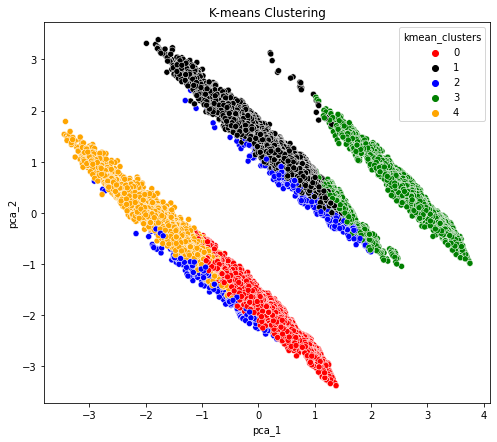

In [112]:

plt.figure(figsize=(8,7))
ax=sns.scatterplot(x="pca_1", y="pca_2", hue=cluster_Datta_pcs['kmean_clusters'], data=cluster_Datta_pcs,palette=['Red', 'Black', 'Blue','Green','Orange'])
plt.title('K-means Clustering')


plt.show()

### Kmeans centroid points

In [113]:
k_Means.cluster_centers_

array([[ 0.05664509, -0.88551211,  0.29601443,  0.98709623, -0.29900762,
        -0.8660031 , -0.07746618,  0.20787343, -0.33721874,  0.78591712],
       [-0.03809657,  0.52674014, -0.2471013 , -1.01307245,  0.45141661,
         0.59476434, -0.2106883 ,  0.325843  ,  0.27038773, -0.45486983],
       [ 0.03339153, -0.1453427 ,  0.02024577, -0.0671728 , -0.98568202,
         0.19567958,  0.61618867, -1.21292705,  0.1969396 , -0.3424129 ],
       [ 0.01531992,  1.72000461,  0.5155696 , -1.01307245, -0.20169283,
        -1.03403047,  0.02784624,  0.11128444, -0.5251467 ,  0.87976324],
       [-0.04426827, -0.88551211, -0.37955804,  0.98709623,  0.59683683,
         0.74169909, -0.1347553 ,  0.19582191,  0.24805822, -0.61350606]])

#### Gaussian Mixture

In [114]:
from sklearn.mixture import GaussianMixture
Gauss_Model = GaussianMixture(n_components=5,random_state = 32)

In [115]:
cluster_Datta_Gauss = cluster_Datta.copy()
Gauss_Model.fit(Data)
cluster_Datta_Gauss['gm_clusters'] = Gauss_Model.predict(Data)

In [116]:
cluster_Datta_Gauss

,pca_1,pca_2,gm_clusters
0,-1.660550,0.117743,1
1,-0.636855,-1.005488,1
2,-1.757125,0.092303,1
3,2.535045,0.772821,3
4,-0.068059,1.828473,0
...,...,...,...
18013,-1.137746,-0.960868,4
18014,0.642835,0.632219,0
18015,-0.450846,-1.708836,4
18016,-1.691427,-0.448142,4


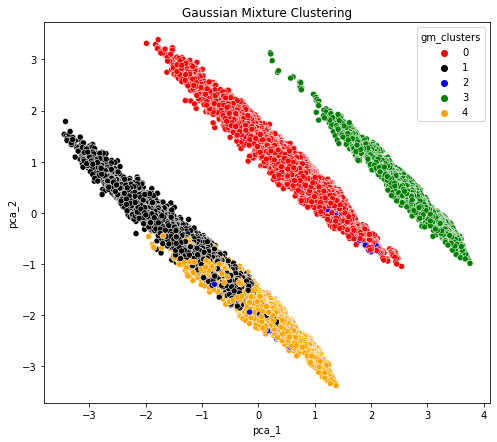

In [117]:
plt.figure(figsize=(8,7))
Gauss_plot = sns.scatterplot(x="pca_1", y="pca_2", hue=cluster_Datta_Gauss['gm_clusters'], data=cluster_Datta_Gauss,palette=['Red', 'Black', 'Blue','Green','Orange'])
plt.title('Gaussian Mixture Clustering')
plt.show()

### Centroid of Gaussian Mixture

In [118]:
Gauss_Model.means_

array([[-0.00197757,  0.51874393, -0.12271373, -1.01307245,  0.08370745,
         0.44096475, -0.0634508 ,  0.02774007,  0.167276  , -0.40535012],
       [-0.0031255 , -0.88551211, -0.24627553,  0.98709623,  0.59305689,
         0.54822105, -0.13965895,  0.13160589,  0.15809718, -0.50467747],
       [-0.03681138, -0.18410629,  0.63791671, -0.01195943, -0.62708741,
         0.57078599,  0.96122421, -1.64313868,  0.34682718,  1.10280998],
       [-0.03197829,  1.92299997,  0.42376793, -1.01307245, -0.16113495,
        -1.1421125 ,  0.08920074,  0.09232762, -0.43058384,  0.93484308],
       [ 0.02769845, -0.88551211,  0.14787351,  0.98709623, -0.61808712,
        -0.6246487 ,  0.11179738, -0.09868113, -0.19542214,  0.50539918]])

#### BIRCH CLUSTERING

In [119]:
from sklearn.neighbors import NearestCentroid
near_Cento_Agglo = NearestCentroid()

In [120]:
from sklearn.cluster import Birch

In [121]:
birch_Model = Birch(n_clusters=5)


In [122]:
cluster_Datta_br= cluster_Datta.copy()

cluster_Datta_br

cluster_Datta_br['br_clusters'] = birch_Model.fit_predict(Data)

In [123]:
cluster_Datta_br

,pca_1,pca_2,br_clusters
0,-1.660550,0.117743,3
1,-0.636855,-1.005488,0
2,-1.757125,0.092303,3
3,2.535045,0.772821,1
4,-0.068059,1.828473,4
...,...,...,...
18013,-1.137746,-0.960868,3
18014,0.642835,0.632219,4
18015,-0.450846,-1.708836,0
18016,-1.691427,-0.448142,3


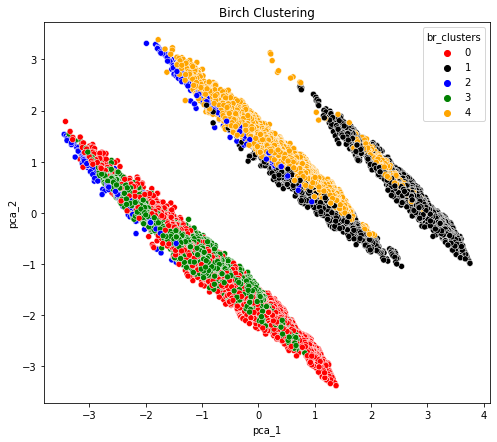

In [124]:
plt.figure(figsize=(8,7))
Birch_plot = sns.scatterplot(x="pca_1", y="pca_2", hue=cluster_Datta_br['br_clusters'], data=cluster_Datta_br,palette=['Red', 'Black', 'Blue','Green','Orange'])
plt.title('Birch Clustering')
plt.show()

### Centroid points of Birch Clustering Algorithm

In [125]:
near_Cento_Birch = NearestCentroid()

In [126]:
near_Cento_Birch.fit(Data,cluster_Datta_br['br_clusters'])

NearestCentroid()

In [127]:
near_Cento_Birch.centroids_

array([[ 0.1371624 , -0.88551211,  0.29931465,  0.98709623,  0.11933366,
        -0.28015122,  0.05111498, -0.10902501, -1.23695229,  0.11833635],
       [ 0.00562244,  1.22829937,  0.21825959, -1.01307245, -0.50005125,
        -0.44878303,  0.3511099 , -0.20823576, -0.32595248,  0.35486664],
       [-0.22151316, -0.15820818, -0.3068364 , -0.04884771,  0.00791077,
         0.78674644, -0.91307431, -0.92971414,  0.52093429, -1.84460113],
       [-0.02962538, -0.88551211, -0.20760213,  0.98709623, -0.08057606,
         0.07370481,  0.07150402,  0.15303222,  0.67747777,  0.13934715],
       [-0.00919611,  0.60191256, -0.12057917, -1.01307245,  0.59244032,
         0.40142961, -0.25198691,  0.43091882,  0.32229525, -0.10028959]])

**PROBLEM 12**: Prepare dataset (train-60%,validate-20%,test-20%) with customers, customers attributes and sales value (for orders placed by these customers). Use PySpark MLLib to develop a regression model to predict sales value for new customers (test-20%)

In [128]:
from sklearn.model_selection import train_test_split

In [129]:
merged_data=pd.merge(customers, sales, on='CustomerKey',how='left').fillna(0)

In [130]:
merged_data.dtypes

CustomerKey                int64
Prefix                    object
FirstName                 object
LastName                  object
BirthDate         datetime64[ns]
MaritalStatus             object
Gender                    object
AnnualIncome               int64
TotalChildren              int64
EducationLevel            object
Occupation                object
HomeOwner                 object
OrderDate                 object
StockDate                 object
OrderNumber               object
ProductKey               float64
TerritoryKey             float64
OrderLineItem            float64
OrderQuantity            float64
Day                      float64
Month                    float64
Year                     float64
dtype: object

In [131]:
merged_data["BirthDate"] = merged_data["BirthDate"].dt.strftime('%Y-%m-%d')
birth = merged_data["BirthDate"].str.split("-", n = 2, expand = True)
merged_data["Birth_Year"]=birth[0]

merged_data=merged_data.drop(['FirstName','LastName','BirthDate','OrderDate','StockDate','Day','Month','Year'],1)


In [132]:
merged_data

,CustomerKey,Prefix,MaritalStatus,Gender,AnnualIncome,TotalChildren,EducationLevel,Occupation,HomeOwner,OrderNumber,ProductKey,TerritoryKey,OrderLineItem,OrderQuantity,Birth_Year
0,11000,MR.,M,M,90000,2,Bachelors,Professional,Y,SO51522,485.0,9.0,2.0,2.0,1966
1,11000,MR.,M,M,90000,2,Bachelors,Professional,Y,SO51522,352.0,9.0,1.0,1.0,1966
2,11000,MR.,M,M,90000,2,Bachelors,Professional,Y,SO57418,530.0,9.0,3.0,2.0,1966
3,11000,MR.,M,M,90000,2,Bachelors,Professional,Y,SO57418,541.0,9.0,2.0,2.0,1966
4,11000,MR.,M,M,90000,2,Bachelors,Professional,Y,SO57418,214.0,9.0,4.0,1.0,1966
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56773,29480,MRS.,S,F,30000,3,Graduate Degree,Clerical,Y,SO62341,215.0,10.0,4.0,1.0,1960
56774,29480,MRS.,S,F,30000,3,Graduate Degree,Clerical,Y,SO62341,562.0,10.0,1.0,1.0,1960
56775,29481,MR.,S,M,30000,3,Graduate Degree,Clerical,N,SO45427,349.0,8.0,1.0,1.0,1960
56776,29482,MR.,M,M,30000,3,Bachelors,Clerical,Y,SO49746,358.0,7.0,1.0,1.0,1959


In [133]:
###let's do encoding

In [134]:
x=merged_data
y=merged_data['Prefix']




In [135]:
x["Prefix"]=x['Prefix'].replace(0,"Temp")
y=y.replace(0,"Temp")

In [136]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
x['Prefix']=le.fit_transform(x['Prefix'])
y = le.transform(y)


In [137]:
### For Marital Status

In [138]:
x=merged_data
y=merged_data["MaritalStatus"]

In [139]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
x['MaritalStatus']=le.fit_transform(x['MaritalStatus'])
y = le.transform(y)


In [140]:
merged_data

,CustomerKey,Prefix,MaritalStatus,Gender,AnnualIncome,TotalChildren,EducationLevel,Occupation,HomeOwner,OrderNumber,ProductKey,TerritoryKey,OrderLineItem,OrderQuantity,Birth_Year
0,11000,0,0,M,90000,2,Bachelors,Professional,Y,SO51522,485.0,9.0,2.0,2.0,1966
1,11000,0,0,M,90000,2,Bachelors,Professional,Y,SO51522,352.0,9.0,1.0,1.0,1966
2,11000,0,0,M,90000,2,Bachelors,Professional,Y,SO57418,530.0,9.0,3.0,2.0,1966
3,11000,0,0,M,90000,2,Bachelors,Professional,Y,SO57418,541.0,9.0,2.0,2.0,1966
4,11000,0,0,M,90000,2,Bachelors,Professional,Y,SO57418,214.0,9.0,4.0,1.0,1966
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56773,29480,1,1,F,30000,3,Graduate Degree,Clerical,Y,SO62341,215.0,10.0,4.0,1.0,1960
56774,29480,1,1,F,30000,3,Graduate Degree,Clerical,Y,SO62341,562.0,10.0,1.0,1.0,1960
56775,29481,0,1,M,30000,3,Graduate Degree,Clerical,N,SO45427,349.0,8.0,1.0,1.0,1960
56776,29482,0,0,M,30000,3,Bachelors,Clerical,Y,SO49746,358.0,7.0,1.0,1.0,1959


In [141]:
### For Gender

In [142]:
x=merged_data
y=merged_data["Gender"]

In [143]:
x["Gender"]=x['Gender'].replace(0,"Temp")
y=y.replace(0,"Temp")

In [144]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
x['Gender']=le.fit_transform(x['Gender'])
y = le.transform(y)


In [145]:
###For Education Level

In [146]:
x=merged_data
y=merged_data["EducationLevel"]

In [147]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
x['EducationLevel']=le.fit_transform(x['EducationLevel'])
y = le.transform(y)


In [148]:
### Occupation

In [149]:
x=merged_data
y=merged_data["Occupation"]

In [150]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
x['Occupation']=le.fit_transform(x['Occupation'])
y = le.transform(y)


In [151]:
####HomeOwner

In [152]:
x=merged_data
y=merged_data["HomeOwner"]

In [153]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
x['HomeOwner']=le.fit_transform(x['HomeOwner'])
y = le.transform(y)


In [154]:
merged_data=merged_data.drop('OrderNumber',1)


In [155]:
merged_data['Birth_Year']=merged_data['Birth_Year'].astype(str).astype(int)

In [156]:
merged_data.corr()

,CustomerKey,Prefix,MaritalStatus,Gender,AnnualIncome,TotalChildren,EducationLevel,Occupation,HomeOwner,ProductKey,TerritoryKey,OrderLineItem,OrderQuantity,Birth_Year
CustomerKey,1.000000,-0.015877,0.073581,0.014144,-0.083173,-0.030653,0.039907,-0.004087,-0.122334,0.019134,-0.056955,-0.033342,-0.000354,0.026026
Prefix,-0.015877,1.000000,0.116414,-0.776441,-0.032537,-0.213873,0.006576,0.018794,-0.066426,-0.002825,0.027322,-0.005709,-0.007802,0.168342
MaritalStatus,0.073581,0.116414,1.000000,-0.048331,-0.105169,-0.163444,0.077737,-0.026209,-0.312977,-0.009362,0.026762,-0.002825,-0.021955,0.203760
Gender,0.014144,-0.776441,-0.048331,1.000000,-0.002179,0.005013,0.005984,-0.019993,-0.014785,0.008567,0.003037,0.001425,0.012946,-0.008165
AnnualIncome,-0.083173,-0.032537,-0.105169,-0.002179,1.000000,0.212617,-0.177383,0.100002,0.035777,-0.024806,-0.053521,0.024838,-0.013142,-0.173750
TotalChildren,-0.030653,-0.213873,-0.163444,0.005013,0.212617,1.000000,-0.010735,-0.011929,0.182736,-0.003256,-0.104800,0.007300,0.035729,-0.509602
EducationLevel,0.039907,0.006576,0.077737,0.005984,-0.177383,-0.010735,1.000000,0.035651,-0.090201,0.007097,-0.013476,-0.003368,0.030886,0.020642
Occupation,-0.004087,0.018794,-0.026209,-0.019993,0.100002,-0.011929,0.035651,1.000000,-0.006384,0.004198,-0.208970,-0.010627,0.005131,0.159250
HomeOwner,-0.122334,-0.066426,-0.312977,-0.014785,0.035777,0.182736,-0.090201,-0.006384,1.000000,-0.006768,-0.043284,0.006483,-0.001423,-0.113990
ProductKey,0.019134,-0.002825,-0.009362,0.008567,-0.024806,-0.003256,0.007097,0.004198,-0.006768,1.000000,0.068626,-0.155475,0.357662,0.010336


In [157]:
from imblearn.over_sampling import RandomOverSampler

In [158]:
X=merged_data.drop('OrderQuantity',1)

In [159]:
y=merged_data['OrderQuantity']

In [160]:
ros = RandomOverSampler()
# resampling X, y
X, y = ros.fit_resample(X, y)

In [161]:
for ind in range(len(y)):
    if y[ind] !=0:
        y[ind]=1

In [162]:
X_, X_test, y_, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [163]:
X_train,X_val,y_train,y_val=train_test_split(X_, y_, test_size=0.20, random_state=42)

In [164]:
import seaborn as sns

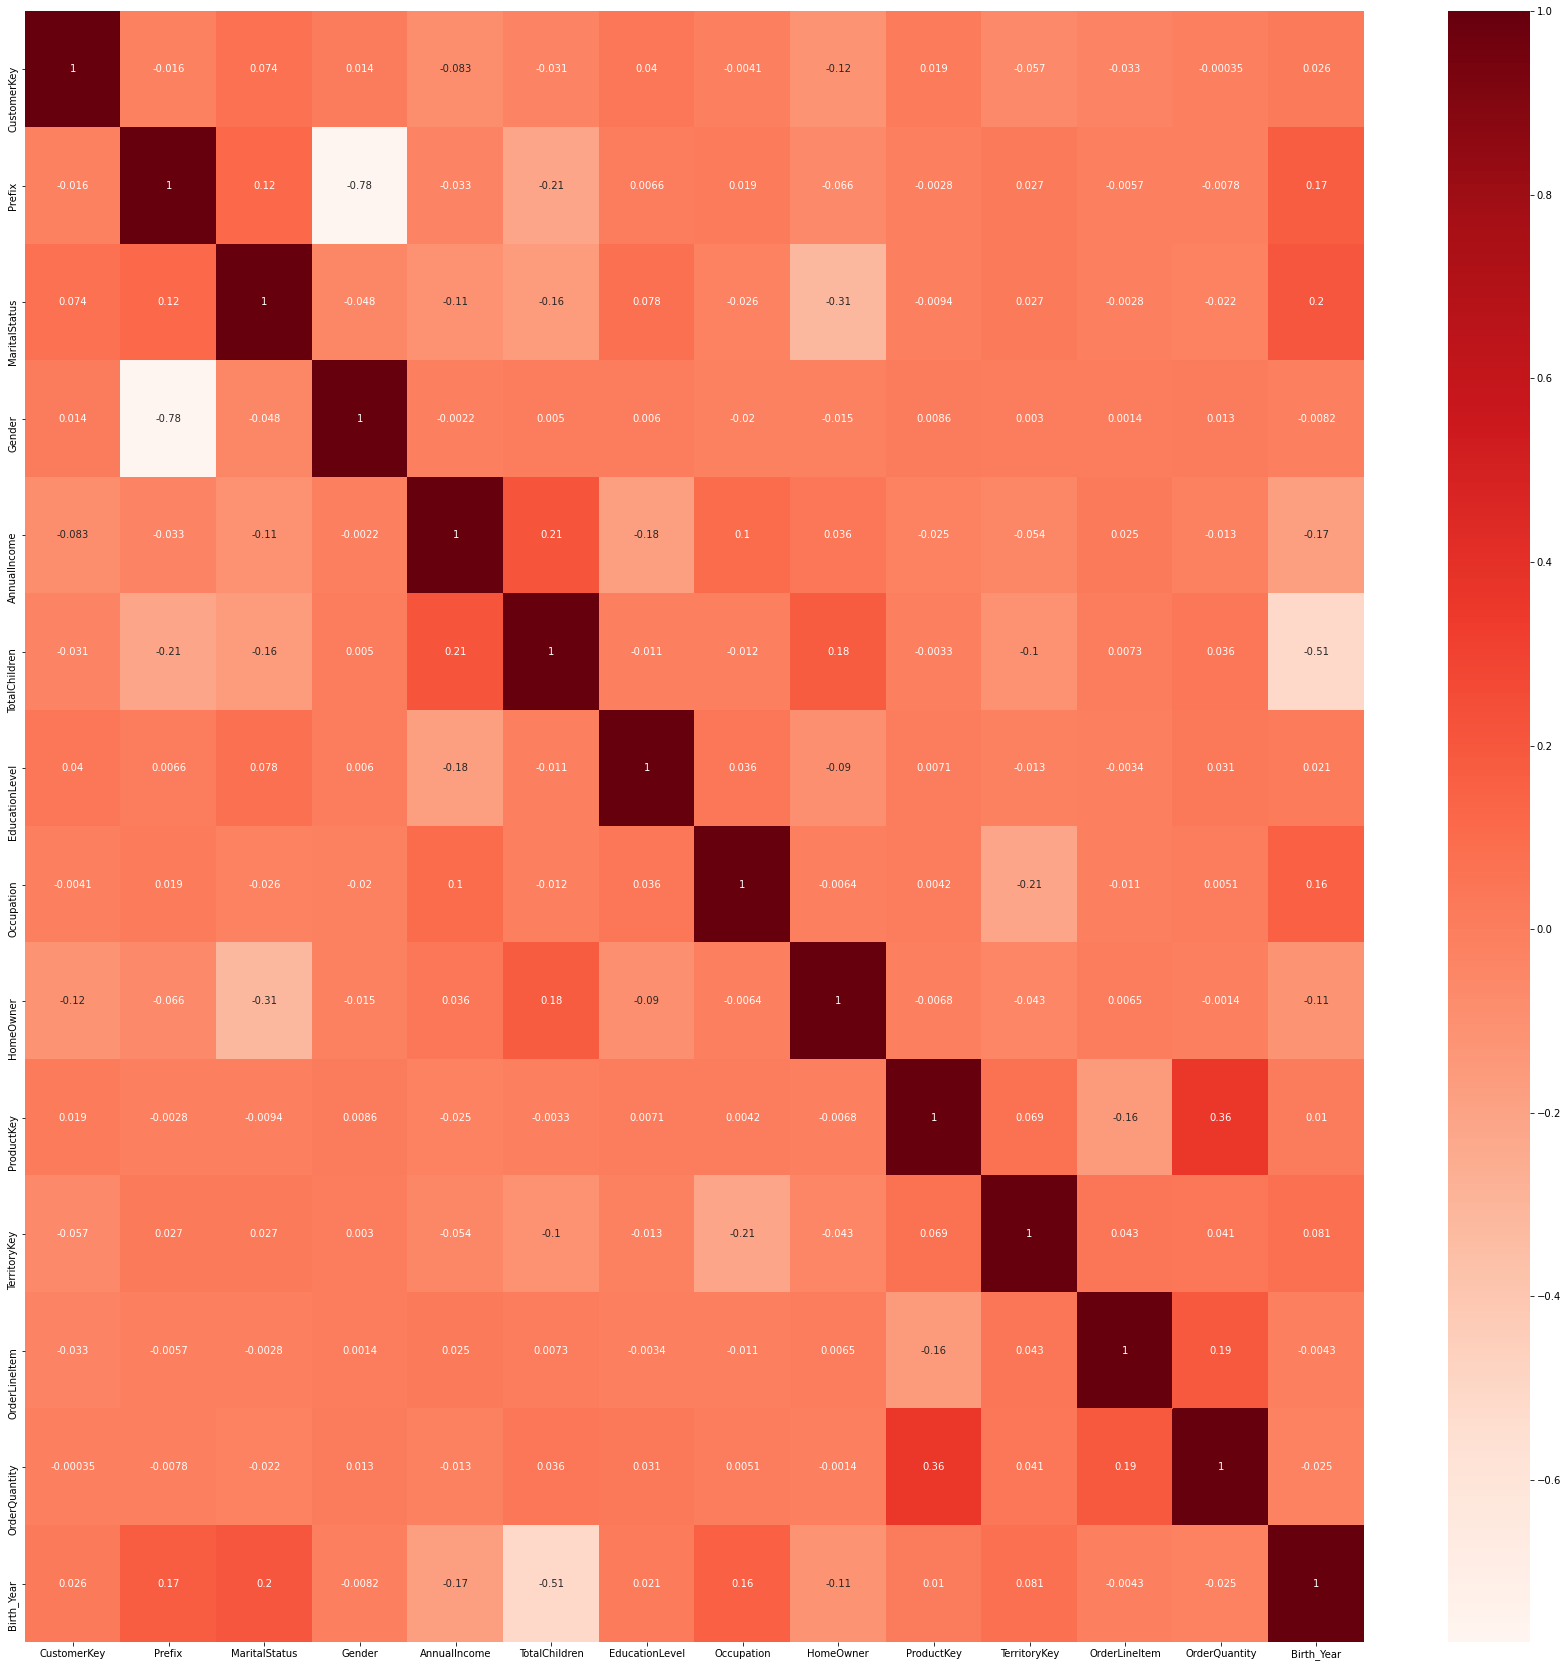

In [165]:
#Using Pearson Correlation
plt.figure(figsize=(30,30))
cor = merged_data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

#### we have now prepared the required dataset

In [166]:
#Logistic Regression Model
from sklearn.linear_model import LogisticRegression
lreg=LogisticRegression()

In [167]:
lreg.fit(X_train,y_train)

LogisticRegression()

In [168]:
lreg.score(X_val,y_val)

1.0

In [169]:
lreg.score(X_test,y_test)

1.0

In [170]:
pred=lreg.predict(X_test)

In [171]:
import collections
collections.Counter(pred)

Counter({1.0: 18784, 0.0: 6353})

In [172]:
collections.Counter(y_test)

Counter({1.0: 18784, 0.0: 6353})

In [173]:
#### Pretty sure this is someoverfitting here

**PROBLEM 13**: Fetch count of stop-words for ham & spam (compute count of stop-words for each record on worker nodes and aggregate for count ham & spam on driver node)

---
Stopwords are the words in any language which does not add much meaning to a sentence. They can safely be ignored without sacrificing the meaning of the sentence

In [174]:
sms

[['ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...\n',
  'ham\tOk lar... Joking wif u oni...\n',
  "spam\tFree entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's\n",
  'ham\tU dun say so early hor... U c already then say...\n',
  "ham\tNah I don't think he goes to usf, he lives around here though\n",
  "spam\tFreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv\n",
  'ham\tEven my brother is not like to speak with me. They treat me like aids patent.\n',
  "ham\tAs per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune\n",
  'spam\tWINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To

In [175]:
sms_data=pd.read_csv(path+'sms.txt', sep='\t',header=None)

In [176]:
sms_data

,0,1
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [177]:
import nltk
data = [['ham', 'And how you will do that, princess? :)'], ['spam', 'Urgent! Please call 09061213237 from landline. £5000 cash or a luxury 4* Canary Islands Holiday await collection']]

for text in (label_text[1] for label_text in data):
    print(text)
    filtered_tokens = [token for token in nltk.word_tokenize(text) if token.lower() not in nltk.corpus.stopwords.words('english')]
    print(filtered_tokens)

And how you will do that, princess? :)
[',', 'princess', '?', ':', ')']
Urgent! Please call 09061213237 from landline. £5000 cash or a luxury 4* Canary Islands Holiday await collection
['Urgent', '!', 'Please', 'call', '09061213237', 'landline', '.', '£5000', 'cash', 'luxury', '4', '*', 'Canary', 'Islands', 'Holiday', 'await', 'collection']


In [178]:
ham=[]
spam=[]
total=[]
import nltk
#nltk.download('punkt')

In [179]:

for text in (sms_data[1]):
    print(text)
    tokens_stopword = [token for token in nltk.word_tokenize(text) if token.lower() in nltk.corpus.stopwords.words('english')]
    total.append(tokens_stopword)
#     else:
#         spam.append(tokens_stopword)

Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
Ok lar... Joking wif u oni...
Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
U dun say so early hor... U c already then say...
Nah I don't think he goes to usf, he lives around here though
FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv
Even my brother is not like to speak with me. They treat me like aids patent.
As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune
WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.
Had your mobile 11 months or more? U R entitl

How are you doing? Hope you've settled in for the new school year. Just wishin you a gr8 day
Gud mrng dear hav a nice day
Did u got that persons story
is your hamster dead? Hey so tmr i meet you at 1pm orchard mrt? 
Hi its Kate how is your evening? I hope i can see you tomorrow for a bit but i have to bloody babyjontet! Txt back if u can. :) xxx
Found it, ENC  &lt;#&gt; , where you at?
I sent you  &lt;#&gt;  bucks
Hello darlin ive finished college now so txt me when u finish if u can love Kate xxx
Your account has been refilled successfully by INR  &lt;DECIMAL&gt; . Your KeralaCircle prepaid account balance is Rs  &lt;DECIMAL&gt; . Your Transaction ID is KR &lt;#&gt; .
Goodmorning sleeping ga.
U call me alter at 11 ok.
Ü say until like dat i dun buy ericsson oso cannot oredi lar...
As I entered my cabin my PA said, '' Happy B'day Boss !!''. I felt special. She askd me 4 lunch. After lunch she invited me to her apartment. We went there.
Aight yo, dats straight dogg
You please give us co

You made my day. Do have a great day too.
K.k:)advance happy pongal.
Hmmm... Guess we can go 4 kb n power yoga... Haha, dunno we can tahan power yoga anot... Thk got lo oso, forgot liao...
Not really dude, have no friends i'm afraid :(
December only! Had your mobile 11mths+? You are entitled to update to the latest colour camera mobile for Free! Call The Mobile Update Co FREE on 08002986906
Coffee cake, i guess...
Merry Christmas to you too babe, i love ya *kisses*
Hey... Why dont we just go watch x men and have lunch... Haha 
cud u tell ppl im gona b a bit l8 cos 2 buses hav gon past cos they were full & im still waitin 4 1. Pete x
That would be great. We'll be at the Guild. Could meet on Bristol road or somewhere - will get in touch over weekend. Our plans take flight! Have a good week
No problem. How are you doing?
No calls..messages..missed calls
Hi da:)how is the todays class?
I'd say that's a good sign but, well, you know my track record at reading women
Cool, text me when you're

Ok. She'll be ok. I guess
aathi..where are you dear..
Any pain on urination any thing else?
7 at esplanade.. Do ü mind giving me a lift cos i got no car today..
I wnt to buy a BMW car urgently..its vry urgent.but hv a shortage of  &lt;#&gt; Lacs.there is no source to arng dis amt. &lt;#&gt; lacs..thats my prob
At home watching tv lor.
Does she usually take fifteen fucking minutes to respond to a yes or no question
Congrats! Nokia 3650 video camera phone is your Call 09066382422 Calls cost 150ppm Ave call 3mins vary from mobiles 16+ Close 300603 post BCM4284 Ldn WC1N3XX
Booked ticket for pongal?
You available now? I'm like right around hillsborough &amp;  &lt;#&gt; th
The message sent is askin for  &lt;#&gt; dollars. Shoul i pay  &lt;#&gt;  or  &lt;#&gt; ?
Ask g or iouri, I've told the story like ten times already
How long does applebees fucking take
Hi hope u get this txt~journey hasnt been gd,now about 50 mins late I think.
But i have to. I like to have love and arrange.
Yes..he is re

Or maybe my fat fingers just press all these buttons and it doesn't know what to do.
Ummmmmaah Many many happy returns of d day my dear sweet heart.. HAPPY BIRTHDAY dear
I am in tirupur da, once you started from office call me.
from www.Applausestore.com MonthlySubscription@50p/msg max6/month T&CsC web age16 2stop txt stop
A famous quote : when you develop the ability to listen to 'anything' unconditionally without losing your temper or self confidence, it means you are ......... 'MARRIED'
But am going to college pa. What to do. are else ill come there it self. Pa.
4 oclock at mine. Just to bash out a flat plan.
This girl does not stay in bed. This girl doesn't need recovery time. Id rather pass out while having fun then be cooped up in bed
Then any special there?
I know but you need to get hotel now. I just got my invitation but i had to apologise. Cali is to sweet for me to come to some english bloke's weddin
Sorry that took so long, omw now
Wait  &lt;#&gt;  min..
Ok give me 5 minute

PRIVATE! Your 2003 Account Statement for shows 800 un-redeemed S. I. M. points. Call 08715203694 Identifier Code: 40533 Expires 31/10/04
No prob. I will send to your email.
You have won ?1,000 cash or a ?2,000 prize! To claim, call09050000327. T&C: RSTM, SW7 3SS. 150ppm
Thats cool! Sometimes slow and gentle. Sonetimes rough and hard :)
I'm gonna say no. Sorry. I would but as normal am starting to panic about time. Sorry again! Are you seeing on Tuesday?
Wait, do you know if wesleys in town? I bet she does hella drugs!
Fine i miss you very much.
Did u got that persons story
Tell them the drug dealer's getting impatient
Sun cant come to earth but send luv as rays. cloud cant come to river but send luv as rain. I cant come to meet U, but can send my care as msg to U. Gud evng
You will be in the place of that man
It doesnt make sense to take it there unless its free. If you need to know more, wikipedia.com
88800 and 89034 are premium phone services call 08718711108
Under the sea, there lay

Do you realize that in about 40 years, we'll have thousands of old ladies running around with tattoos?
You have an important customer service announcement from PREMIER.
Dont gimme that lip caveboy
When did you get to the library
Realy sorry-i don't recognise this number and am now confused :) who r u please?! 
So why didnt you holla?
Cant think of anyone with * spare room off * top of my head
Faith makes things possible,Hope makes things work,Love makes things beautiful,May you have all three this Christmas!Merry Christmas!
U should have made an appointment
Call me when you/carlos is/are here, my phone's vibrate is acting up and I might not hear texts
Romantic Paris. 2 nights, 2 flights from £79 Book now 4 next year. Call 08704439680Ts&Cs apply.
We are at grandmas. Oh dear, u still ill? I felt Shit this morning but i think i am just hungover! Another night then. We leave on sat.
Urgent Ur £500 guaranteed award is still unclaimed! Call 09066368327 NOW closingdate04/09/02 claimcode M39M5

Going to take your babe out ?
Hai ana tomarrow am coming on morning.  &lt;DECIMAL&gt;  ill be there in sathy then we ll go to RTO office. Reply me after came to home.
Spoons it is then okay?
Did he just say somebody is named tampa
In work now. Going have in few min.
Your brother is a genius
Sorry, I guess whenever I can get a hold of my connections, maybe an hour or two? I'll text you
Did u find out what time the bus is at coz i need to sort some stuff out.
Dude ive been seeing a lotta corvettes lately
Congratulations ur awarded either a yrs supply of CDs from Virgin Records or a Mystery Gift GUARANTEED Call 09061104283 Ts&Cs www.smsco.net £1.50pm approx 3mins
Same here, but I consider walls and bunkers and shit important just because I never play on peaceful but I guess your place is high enough that it don't matter
PRIVATE! Your 2003 Account Statement for 07808 XXXXXX shows 800 un-redeemed S. I. M. points. Call 08719899217 Identifier Code: 41685 Expires 07/11/04
Hello. We need some p

Awesome, lemme know whenever you're around
Shb b ok lor... Thanx...
Beautiful Truth against Gravity.. Read carefully: "Our heart feels light when someone is in it.. But it feels very heavy when someone leaves it.." GOOD NIGHT
Also remember to get dobby's bowl from your car
Filthy stories and GIRLS waiting for your
Sorry i now then c ur msg... Yar lor so poor thing... But only 4 one night... Tmr u'll have a brand new room 2 sleep in...
Love isn't a decision, it's a feeling. If we could decide who to love, then, life would be much simpler, but then less magical
Welp apparently he retired
My sort code is  and acc no is . The bank is natwest. Can you reply to confirm i've sent this to the right person!
Where @
U sure u can't take any sick time?
URGENT! We are trying to contact U. Todays draw shows that you have won a £800 prize GUARANTEED. Call 09050001808 from land line. Claim M95. Valid12hrs only
Watching cartoon, listening music &amp; at eve had to go temple &amp; church.. What about u?

Meeting u is my work. . . Tel me when shall i do my work tomorrow
Someone U know has asked our dating service 2 contact you! Cant Guess who? CALL 09058091854 NOW all will be revealed. PO BOX385 M6 6WU
Jus finish bathing...
alright, I'll make sure the car is back tonight
URGENT! We are trying to contact U. Todays draw shows that you have won a £800 prize GUARANTEED. Call 09050003091 from land line. Claim C52. Valid12hrs only
Dear U've been invited to XCHAT. This is our final attempt to contact u! Txt CHAT to 86688
Lul im gettin some juicy gossip at the hospital. Two nurses are talking about how fat they are gettin. And one thinks shes obese. Oyea.
Aight ill get on fb in a couple minutes
Oi. Ami parchi na re. Kicchu kaaj korte iccha korche na. Phone ta tul na. Plz. Plz.
Where can download clear movies. Dvd copies.
Yep, by the pretty sculpture
Convey my regards to him
Me too watching surya movie only. . .after 6 pm vijay movie POKKIRI
You tell what happen dont behave like this to me. Ok n

You flippin your shit yet?
K give me a sec, breaking a  &lt;#&gt;  at cstore
Am i that much bad to avoid like this?
Yo, you around? Just got my car back
Annoying isn't it.
Goodmorning, Today i am late for  &lt;#&gt; min.
There's no point hangin on to mr not right if he's not makin u happy
All will come alive.better correct any good looking figure there itself..
In that case I guess I'll see you at campus lodge
We're done...
Come to my home for one last time i wont do anything. Trust me.
I was up all night too worrying about this appt. It's a shame we missed a girls night out with quizzes popcorn and you doing my hair.
Sex up ur mobile with a FREE sexy pic of Jordan! Just text BABE to 88600. Then every wk get a sexy celeb! PocketBabe.co.uk 4 more pics. 16 £3/wk 087016248
Ok... C ya...
You have 1 new voicemail. Please call 08719181503
What he said is not the matter. My mind saying some other matter is there.
He also knows about lunch menu only da. . I know
Al he does is moan at me if n e

I cant pick the phone right now. Pls send a message
Your right! I'll make the appointment right now.
Designation is software developer and may be she get chennai:)
Enjoy the jamster videosound gold club with your credits for 2 new videosounds+2 logos+musicnews! get more fun from jamster.co.uk! 16+only Help? call: 09701213186 
Get 3 Lions England tone, reply lionm 4 mono or lionp 4 poly. 4 more go 2 www.ringtones.co.uk, the original n best. Tones 3GBP network operator rates apply
I jokin oni lar.. Ü busy then i wun disturb ü.
Ok, be careful ! Don't text and drive !
I.ll always be there, even if its just in spirit. I.ll get a bb soon. Just trying to be sure i need it.
U r too much close to my heart. If u go away i will be shattered. Plz stay with me.
I love u 2 babe! R u sure everything is alrite. Is he being an idiot? Txt bak girlie
How abt making some of the pics bigger?
Got but got 2 colours lor. One colour is quite light n e other is darker lor. Actually i'm done she's styling my hai

Do you work all this week ?
Congratulations ur awarded either £500 of CD gift vouchers & Free entry 2 our £100 weekly draw txt MUSIC to 87066 TnCs www.Ldew.com 1 win150ppmx3age16
Lol great now im getting hungry.
Yes.. now only saw your message..
I'll be at mu in like  &lt;#&gt;  seconds
Ok...
THING R GOOD THANX GOT EXAMS IN MARCH IVE DONE NO REVISION? IS FRAN STILL WITH BOYF? IVE GOTTA INTERVIW 4 EXETER BIT WORRIED!x
Tell you what, if you make a little spreadsheet and track whose idea it was to smoke to determine who "smokes too much" for the entire month of february, I'll come up
For sale - arsenal dartboard. Good condition but no doubles or trebles!
Don't look back at the building because you have no coat and i don't want you to get more sick. Just hurry home and wear a coat to the gym!!!
My painful personal thought- "I always try to keep everybody happy all the time. But nobody recognises me when i am alone"
Thanks for ve lovely wisheds. You rock
You intrepid duo you! Have a great t

Hows the champ just leaving glasgow!
K:)all the best:)congrats...
I wonder if you'll get this text?
I need to come home and give you some good lovin...
Our brand new mobile music service is now live. The free music player will arrive shortly. Just install on your phone to browse content from the top artists.
Shall i ask one thing if you dont mistake me.
Check wid corect speling i.e. Sarcasm
URGENT! Your Mobile No was awarded a £2,000 Bonus Caller Prize on 1/08/03! This is our 2nd attempt to contact YOU! Call 0871-4719-523 BOX95QU BT National Rate
Are you angry with me. What happen dear
I thk u dun haf 2 hint in e forum already lor... Cos i told ron n darren is going 2 tell shuhui.
Yup ok thanx...
Hi:)cts employee how are you?
Pls pls find out from aunt nike.
Wow ... I love you sooo much, you know ? I can barely stand it ! I wonder how your day goes and if you are well, my love ... I think of you and miss you
No screaming means shouting..
Hey what happen de. Are you alright.
Should I ha

I'll probably be around mu a lot
645
RT-KIng Pro Video Club>> Need help? info@ringtoneking.co.uk or call 08701237397 You must be 16+ Club credits redeemable at www.ringtoneking.co.uk! Enjoy!
Thnx dude. u guys out 2nite?
Me sef dey laugh you. Meanwhile how's my darling anjie!
Mm i had my food da from out
K, makes sense, btw carlos is being difficult so you guys are gonna smoke while I go pick up the second batch and get gas
Did u download the fring app?
The 2 oz guy is being kinda flaky but one friend is interested in picking up $ &lt;#&gt;  worth tonight if possible
Friends that u can stay on fb chat with
Fuck babe, I miss you sooooo much !! I wish you were here to sleep with me ... My bed is so lonely ... I go now, to sleep ... To dream of you, my love ...
Living is very simple.. Loving is also simple.. Laughing is too simple.. Winning is tooo simple.. But, being 'SIMPLE' is very difficult.. Gud nte.:-
U have a secret admirer who is looking 2 make contact with U-find out who they R*re

Why tired what special there you had
I will come tomorrow di
I cant pick the phone right now. Pls send a message
K go and sleep well. Take rest:-).
U guys never invite me anywhere :(
UR GOING 2 BAHAMAS! CallFREEFONE 08081560665 and speak to a live operator to claim either Bahamas cruise of£2000 CASH 18+only. To opt out txt X to 07786200117
I can do that! I want to please you both inside and outside the bedroom...
EY! CALM DOWNON THEACUSATIONS.. ITXT U COS IWANA KNOW WOTU R DOIN AT THEW/END... HAVENTCN U IN AGES..RING ME IF UR UP4 NETHING SAT.LOVE J XXX.
I love to wine and dine my lady!
Someone has conacted our dating service and entered your phone because they fancy you!To find out who it is call from landline 09111030116. PoBox12n146tf15
Im cool ta luv but v.tired 2 cause i have been doin loads of planning all wk, we have got our social services inspection at the nursery! Take care & spk sn x.
I don know account details..i will ask my mom and send you.my mom is out of reach now.
I th

K.:)you are the only girl waiting in reception ah?
Say this slowly.? GOD,I LOVE YOU &amp; I NEED YOU,CLEAN MY HEART WITH YOUR BLOOD.Send this to Ten special people &amp; u c miracle tomorrow, do it,pls,pls do it...
I hate when she does this. She turns what should be a fun shopping trip into an annoying day of how everything would look in her house.
Sir, i am waiting for your call.
What's up. Do you want me to come online?
It could work, we'll reach a consensus at the next meeting
Aiyah then i wait lor. Then u entertain me. Hee...
The last thing i ever wanted to do was hurt you. And i didn't think it would have. You'd laugh, be embarassed, delete the tag and keep going. But as far as i knew, it wasn't even up. The fact that you even felt like i would do it to hurt you shows you really don't know me at all. It was messy wednesday, but it wasn't bad. The problem i have with it is you HAVE the time to clean it, but you choose not to. You skype, you take pictures, you sleep, you want to go 

Thats cool. Where should i cum? On you or in you? :)
Delhi and chennai still silent.
Lol alright i was thinkin that too haha
Reply to win £100 weekly! Where will the 2006 FIFA World Cup be held? Send STOP to 87239 to end service
No I'm in the same boat. Still here at my moms. Check me out on yo. I'm half naked.
Shhhhh nobody is supposed to know!
Sorry, I'll call later
Sorry, I'll call later in meeting any thing related to trade please call Arul. &lt;#&gt; 
Hey i will be late... i'm at amk. Need to drink tea or coffee
I wnt to buy a BMW car urgently..its vry urgent.but hv a shortage of  &lt;#&gt; Lacs.there is no source to arng dis amt. &lt;#&gt; lacs..thats my prob
Urgent! Please call 09061743810 from landline. Your ABTA complimentary 4* Tenerife Holiday or #5000 cash await collection SAE T&Cs Box 326 CW25WX 150 ppm
The length is e same but e top shorter n i got a fringe now. I thk i'm not going liao. Too lazy. Dun wan 2 distract u also.
S..antha num corrct dane
No calls..messages..mis

alright babe, justthought id sayhey! how u doin?nearly the endof me wk offdam nevamind!We will have 2Hook up sn if uwant m8? loveJen x.
Well done ENGLAND! Get the official poly ringtone or colour flag on yer mobile! text TONE or FLAG to 84199 NOW! Opt-out txt ENG STOP. Box39822 W111WX £1.50
No i'm not. I can't give you everything you want and need. You actually could do better for yourself on yor own--you've got more money than i do. I can't get work, i can't get a man, i can't pay the rent, i can't even fill my fucking gas tank. yes, i'm stressed and depressed. I didn't even call home for thanksgiving cuz i'll have to tell them i,m up to nothing.
S:-)kallis wont play in first two odi:-)
Then get some cash together and I'll text jason
Oh, my love, it's soooo good to hear from you. Omg I missed you so much today. I'm sorry your having problems with the provider but thank you for tming me
Final Chance! Claim ur £150 worth of discount vouchers today! Text YES to 85023 now! SavaMob, membe

I wont. So wat's wit the guys
Yavnt tried yet and never played original either
Hiya, had a good day? Have you spoken to since the weekend?
See? I thought it all through
I'm at work. Please call
get ready to moan and scream :)
Oh k :)why you got job then whats up?
I don,t think so. You don't need to be going out that late on a school night. ESPECIALLY when the one class you have is the one you missed last wednesday and probably failed a test in on friday
And popping &lt;#&gt; ibuprofens was no help.
Babe ! How goes that day ? What are you doing ? Where are you ? I sip my cappuccino and think of you, my love ... I send a kiss to you from across the sea
Ok.
PS U no ur a grown up now right?
Chinatown got porridge, claypot rice, yam cake, fishhead beehoon... Either we eat cheap den go cafe n tok or go nydc or somethin...
I know a few people I can hit up and fuck to the yes
Purity of friendship between two is not about smiling after reading the forwarded message..Its about smiling just by se

We can make a baby in yo tho
Should I tell my friend not to come round til like  &lt;#&gt; ish?
Friendship poem: Dear O Dear U R Not Near But I Can Hear Dont Get Fear Live With Cheer No More Tear U R Always my Dear. Gud ni8
Still in the area of the restaurant. Ill try to come back soon
Aight that'll work, thanks
WIN a year supply of CDs 4 a store of ur choice worth £500 & enter our £100 Weekly draw txt MUSIC to 87066 Ts&Cs www.Ldew.com.subs16+1win150ppmx3
Moby Pub Quiz.Win a £100 High Street prize if u know who the new Duchess of Cornwall will be? Txt her first name to 82277.unsub STOP £1.50 008704050406 SP Arrow
I have 2 sleeping bags, 1 blanket and paper and  phone details. Anything else?
You have won a Nokia 7250i. This is what you get when you win our FREE auction. To take part send Nokia to 86021 now. HG/Suite342/2Lands Row/W1JHL 16+ 
Congratulations! Thanks to a good friend U have WON the £2,000 Xmas prize. 2 claim is easy, just call 08718726971 NOW! Only 10p per minute. BT-natio

Dear where you will be when i reach there
Aww that's the first time u said u missed me without asking if I missed u first. You DO love me! :)
Ok... Thanx... Gd nite 2 ü too...
Come to me right now, Ahmad
I don't know u and u don't know me. Send CHAT to 86688 now and let's find each other! Only 150p/Msg rcvd. HG/Suite342/2Lands/Row/W1J6HL LDN. 18 years or over.
Lol please do. Actually send a pic of yourself right now. I wanna see. Pose with a comb and hair dryer or something.
O was not into fps then.
Huh means computational science... Y they like dat one push here n there...
Could you not read me, my Love ? I answered you
Oh... Lk tt den we take e one tt ends at cine lor... Dun wan yogasana oso can... 
Madam,regret disturbance.might receive a reference check from DLF Premarica.kindly be informed.Rgds,Rakhesh,Kerala.
SMS SERVICES For your inclusive text credits pls gotto www.comuk.net login 3qxj9 unsubscribe with STOP no extra charge help 08702840625 comuk.220cm2 9AE
Oic... Then better q

Sorry, I'll call later
Dunno lei... I might b eatin wif my frens... If ü wan to eat then i wait 4 ü lar
Sorry, I'll call later
FREE entry into our £250 weekly comp just send the word WIN to 80086 NOW. 18 T&C www.txttowin.co.uk
Say this slowly.? GOD,I LOVE YOU &amp; I NEED YOU,CLEAN MY HEART WITH YOUR BLOOD.Send this to Ten special people &amp; u c miracle tomorrow, do it,pls,pls do it...
Do u noe how 2 send files between 2 computers?
Mmmmm ... I loved waking to your words this morning ! I miss you too, my Love. I hope your day goes well and you are happy. I wait for us to be together again
jay says he'll put in  &lt;#&gt;
Can you just come in for a sec? There's somebody here I want you to see
So the sun is anti sleep medicine.
What's happening with you. Have you gotten a job and have you begun registration for permanent residency
Yup ok...
Glad it went well :) come over at 11 then we'll have plenty of time before claire goes to work.
Ok enjoy . R u there in home.
Can you pls pls send m

Sorry, I'll call later
Em, its olowoyey@ usc.edu have a great time in argentina. Not sad about secretary, everything is a blessing
It,,s a taxt massage....tie-pos argh ok! Lool!
Hi, can i please get a  &lt;#&gt;  dollar loan from you. I.ll pay you back by mid february. Pls.
You might want to pull out more just in case and just plan on not spending it if you can, I don't have much confidence in derek and taylor's money management
Do you like shaking your booty on the dance floor?
Text me when you get off, don't call, my phones having problems
No need for the drug anymore.
Sorry da:)i was thought of calling you lot of times:)lil busy.i will call you at noon..
Its sarcasm.. .nt scarcasim
Great! I have to run now so ttyl!
Feel like trying kadeem again? :V
Dai  &lt;#&gt;  naal eruku.
Not yet chikku..wat abt u?
Ok...
Want to finally have lunch today?
Do you know when dad will be back?
Hello darling how are you today? I would love to have a chat, why dont you tell me what you look like and wh

Married local women looking for discreet action now! 5 real matches instantly to your phone. Text MATCH to 69969 Msg cost 150p 2 stop txt stop BCMSFWC1N3XX
Wow v v impressed. Have funs shopping!
I am on the way to ur home
Burger King - Wanna play footy at a top stadium? Get 2 Burger King before 1st Sept and go Large or Super with Coca-Cola and walk out a winner
No problem. Talk to you later
Then ur sis how?
Still in customer place
How come it takes so little time for a child who is afraid of the dark to become a teenager who wants to stay out all night?
Dude u knw also telugu..thts gud..k, gud nyt..
We confirm eating at esplanade?
Send me your id and password
Kind of. Took it to garage. Centre part of exhaust needs replacing. Part ordered n taking it to be fixed tomo morning.
For ur chance to win a £250 cash every wk TXT: ACTION to 80608. T's&C's www.movietrivia.tv custcare 08712405022, 1x150p/wk.
Well I might not come then...
Long after I quit. I get on only like 5 minutes a day as it

See you there! 
I dont understand your message.
Crucify is c not s. You should have told me earlier.
Idk. You keep saying that you're not, but since he moved, we keep butting heads over freedom vs. responsibility. And i'm tired. I have so much other shit to deal with that i'm barely keeping myself together once this gets added to it.
Fuck cedar key and fuck her (come over anyway tho)
twenty past five he said will this train have been to durham already or not coz i am in a reserved seat
Hey Boys. Want hot XXX pics sent direct 2 ur phone? Txt PORN to 69855, 24Hrs free and then just 50p per day. To stop text STOPBCM SF WC1N3XX
U still painting ur wall?
Last Chance! Claim ur £150 worth of discount vouchers today! Text SHOP to 85023 now! SavaMob, offers mobile! T Cs SavaMob POBOX84, M263UZ. £3.00 Sub. 16
Printer is cool. I mean groovy. Wine is groovying
Hi Harish's rent has been transfred to ur Acnt.
Anything lor is she coming?
Cbe is really good nowadays:)lot of shop and showrooms:)city is

They released vday shirts and when u put it on it makes your bottom half naked instead of those white underwear.
Don know..he is watching film in computer..
No b4 Thursday
Oh, then your phone phoned me but it disconnected
Id onluy matters when getting on from offcampus
This message is free. Welcome to the new & improved Sex & Dogging club! To unsubscribe from this service reply STOP. msgs@150p 18+only
Excellent, I'll see what riley's plans are
I will see in half an hour
You've won tkts to the EURO2004 CUP FINAL or £800 CASH, to collect CALL 09058099801 b4190604, POBOX 7876150ppm
Ew are you one of them?
Also hi wesley how've you been
Ah you see. You have to be in the lingo. I will let you know wot on earth it is when has finished making it!
Loan for any purpose £500 - £75,000. Homeowners + Tenants welcome. Have you been previously refused? We can still help. Call Free 0800 1956669 or text back 'help'
Update_Now - 12Mths Half Price Orange line rental: 400mins...Call MobileUpd8 on 0800083

Good evening! this is roger. How are you?
Small problem in auction:)punj now asking tiwary
Free entry in 2 a weekly comp for a chance to win an ipod. Txt POD to 80182 to get entry (std txt rate) T&C's apply 08452810073 for details 18+
He telling not to tell any one. If so treat for me hi hi hi
My uncles in Atlanta. Wish you guys a great semester.
1st wk FREE! Gr8 tones str8 2 u each wk. Txt NOKIA ON to 8007 for Classic Nokia tones or HIT ON to 8007 for Polys. Nokia/150p Poly/200p 16+
U coming 2 pick me?
Thats cool. i liked your photos. You are very sexy!
would u fuckin believe it they didnt know i had thurs pre booked off so they re cancelled me AGAIN! that needs to b sacked
Haha better late than ever, any way I could swing by?
Ok. But i finish at 6.
LookAtMe!: Thanks for your purchase of a video clip from LookAtMe!, you've been charged 35p. Think you can do better? Why not send a video in a MMSto 32323.
I've been barred from all B and Q stores for life!?This twat in orange dungerees c

Aight text me when you're back at mu and I'll swing by, need somebody to get the door for me
Ron say fri leh. N he said ding tai feng cant make reservations. But he said wait lor.
Good. No swimsuit allowed :)
Am okay. Will soon be over. All the best
A cute thought for friendship: "Its not necessary to share every secret with ur close Frnd, but watever u shared should be true"....
Ok i've sent u da latest version of da project.
Good Morning my Dear........... Have a great &amp; successful day.
Pls accept me for one day. Or am begging you change the number.
Squeeeeeze!! This is christmas hug.. If u lik my frndshp den hug me back.. If u get 3 u r cute:) 6 u r luvd:* 9 u r so lucky;) None? People hate u:
Its ok, if anybody asks abt me, u tel them..:-P
Funny fact Nobody teaches volcanoes 2 erupt, tsunamis 2 arise, hurricanes 2 sway aroundn no 1 teaches hw 2 choose a wife Natural disasters just happens
* You gonna ring this weekend or wot?
Also track down any lighters you can find
Sorry, I c

That's fine, have him give me a call if he knows what he wants or has any questions
Sorry, got a late start, we're on the way
Then u go back urself lor...
I AM AT THE GAS STATION. GO THERE.
K, if u bored up just come to my home..
Babe !!!! I LOVE YOU !!!! *covers your face in kisses*
Like I made him throw up when we were smoking in our friend's car one time, it was awesome
Still i have not checked it da. . .
You will go to walmart. I.ll stay.
I haven't forgotten you, i might have a couple bucks to send you tomorrow, k? I love ya too
Oh great. I.ll disturb him more so that we can talk.
Reverse is cheating. That is not mathematics.
U're welcome... Caught u using broken english again...
No problem baby. Is this is a good time to talk? I called and left a message.
Sorry, I'll call later
Oh is it! Which brand?
Sorry i cant take your call right now. It so happens that there r 2waxsto do wat you want. She can come and ill get her medical insurance. And she'll be able to deliver and have basic

I am back. Bit long cos of accident on a30. Had to divert via wadebridge.I had a brilliant weekend thanks. Speak soon. Lots of love
K.. I yan jiu liao... Sat we can go 4 bugis vill one frm 10 to 3 den hop to parco 4 nb. Sun can go cine frm 1030 to 2, den hop to orc mrt 4 hip hop at 4...
Bloomberg -Message center +447797706009 Why wait? Apply for your future http://careers. bloomberg.com
i am seeking a lady in the street and a freak in the sheets. Is that you?
My phone
Haha figures, well I found the piece and priscilla's bowl
Actually fuck that, just do whatever, do find an excuse to be in tampa at some point before january though
URGENT! We are trying to contact U. Todays draw shows that you have won a £800 prize GUARANTEED. Call 09050001808 from land line. Claim M95. Valid12hrs only
yay! finally lol. i missed our cinema trip last week :-(
All day working day:)except saturday and sunday..
aathi..where are you dear..
Heart is empty without love.. Mind is empty without wisdom.. Eyes r em

We know TAJ MAHAL as symbol of love. But the other lesser known facts 1. Mumtaz was Shahjahan's 4th wife, out of his 7 wifes. 2. Shahjahan killed Mumtaz's husband to marry her. 3. Mumtaz died in her  &lt;#&gt; th delivery. 4. He then married Mumtaz's sister. Question arises where the Hell is the LOVE?:-| -The Great Hari-
Its ok..come to my home it vl nice to meet and v can chat..
Collect your VALENTINE'S weekend to PARIS inc Flight & Hotel + £200 Prize guaranteed! Text: PARIS to No: 69101. www.rtf.sphosting.com
Sent me de webadres for geting salary slip
She's fine. Sends her greetings
Customer Loyalty Offer:The NEW Nokia6650 Mobile from ONLY £10 at TXTAUCTION! Txt word: START to No: 81151 & get yours Now! 4T&Ctxt TC 150p/MTmsg
But you dint in touch with me.
Yup, leaving right now, be back soon
You won't believe it but it's true. It's Incredible Txts! Reply G now to learn truly amazing things that will blow your mind. From O2FWD only 18p/txt
Yeah sure I'll leave in a min
And do you have

I get out of class in bsn in like  &lt;#&gt;  minutes, you know where advising is?
Great! I shoot big loads so get ready!
I'll meet you in the lobby
You still coming tonight?
What happen dear tell me
Sir, i am waiting for your call, once free please call me.
No i am not having not any movies in my laptop
I was about to do it when i texted. I finished a long time ago and showered and er'ything!
Ok im not sure what time i finish tomorrow but i wanna spend the evening with you cos that would be vewy vewy lubly! Love me xxx
Hello, As per request from  &lt;#&gt;  Rs.5 has been transfered to you
I am in tirupur.  call you da.
You are a winner you have been specially selected to receive £1000 cash or a £2000 award. Speak to a live operator to claim call 087147123779am-7pm. Cost 10p
S:)but he had some luck.2 catches put down:)
How i noe... Did ü specify da domain as nusstu... Ü still in sch...
Oh...i asked for fun. Haha...take care. ü
Shall i get my pouch?
Hey loverboy! I love you !! I had to 

Dude while were makin those weirdy brownies my sister made awesome cookies. I took pics.
URGENT! We are trying to contact you. Last weekends draw shows that you have won a £900 prize GUARANTEED. Call 09061701851. Claim code K61. Valid 12hours only
Pls dont restrict her from eating anythin she likes for the next two days.
Mm you ask him to come its enough :-)
At the funeral home with Audrey and dad
Aight, can you text me the address?
Excellent! Wish we were together right now!
Yep then is fine 7.30 or 8.30 for ice age.
Pls i wont belive god.not only jesus.
Can. Dunno wat to get 4 her...
Not yet chikku..k, then wat abt tht guy did he stopped irritating or msging to u..
How long does it take to get it.
This is my number by vivek..
74355 XMAS iscoming & ur awarded either £500 CD gift vouchers & free entry 2 r £100 weekly draw txt MUSIC to 87066 TnC
sorry brah, just finished the last of my exams, what up
I got arrested for possession at, I shit you not,  &lt;TIME&gt;  pm
You are right thoug

Y ü wan to go there? C doctor?
Does daddy have a bb now.
Free Msg: get Gnarls Barkleys "Crazy" ringtone TOTALLY FREE just reply GO to this message right now!
She's borderline but yeah whatever.
I got a call from a landline number. . . I am asked to come to anna nagar . . . I will go in the afternoon
Until 545 lor... Ya, can go 4 dinner together...
I will be gentle princess! We will make sweet gentle love...
How u doin baby girl ?? hope u are okay every time I call ure phone is off! I miss u get in touch
Sorry, went to bed early, nightnight
I like to think there's always the possibility of being in a pub later.
HMM yeah if your not too grooved out! And im looking forward to my pound special :)
I got to video tape pple type in message lor. U so free wan 2 help me? Hee... Cos i noe u wan 2 watch infernal affairs so ask u along. Asking shuhui oso.
Hi dude hw r u da realy mising u today
Me hungry buy some food good lei... But mum n yun dun wan juz buy a little bit... 
Refused a loan? Secure

Fyi I'm gonna call you sporadically starting at like  &lt;#&gt;  bc we are not not doin this shit
You are being contacted by our Dating Service by someone you know! To find out who it is, call from your mobile or landline 09064017305 PoBox75LDNS7 
TBS/PERSOLVO. been chasing us since Sept for£38 definitely not paying now thanks to your information. We will ignore them. Kath. Manchester.
Hope youre not having too much fun without me!! see u tomorrow love jess x
Ok i wont call or disturb any one. I know all are avoiding me. I am a burden for all
I've reached home n i bathe liao... U can call me now...
Loans for any purpose even if you have Bad Credit! Tenants Welcome. Call NoWorriesLoans.com on 08717111821
Was the actual exam harder than NBME
A lot of this sickness thing going round. Take it easy. Hope u feel better soon. Lol
God picked up a flower and dippeditinaDEW, lovingly touched itwhichturnedinto u, and the he gifted tomeandsaid,THIS FRIEND IS 4U
87077: Kick off a new season with 2

Are you at work right now ?
Congrats! Nokia 3650 video camera phone is your Call 09066382422 Calls cost 150ppm Ave call 3mins vary from mobiles 16+ Close 300603 post BCM4284 Ldn WC1N3XX
Haven't heard anything and he's not answering my texts so I'm guessing he flaked. That said the jb is fantastic
Mmmmmm ... I love you,so much, Ahmad ... I can't wait for this year to begin as every second takes me closer to being at your side. Happy New Year, my love!!
Pls what's the full name of joke's school cos fees in university of florida seem to actually be  &lt;#&gt; k. Pls holla back
Sorry, I'll call later
Ok... But they said i've got wisdom teeth hidden inside n mayb need 2 remove.
And pls pls drink plenty plenty water
How are you doing. How's the queen. Are you going for the royal wedding
He's in lag. That's just the sad part but we keep in touch thanks to skype
Ok lor then we go tog lor...
Two teams waiting for some players
Can ü send me a copy of da report?
swhrt how u dey,hope ur ok, tot ab

I pocked you up there before
Congrats. That's great. I wanted to tell you not to tell me your score cos it might make me relax. But its motivating me so thanks for sharing
I wud never mind if u dont miss me or if u dont need me.. But u wil really hurt me wen u need me &amp; u dont tell me......... Take care:-)
Hey mr whats the name of that bill brison book the one about language and words 
Okay, good, no problem, and thanx!
For you information, IKEA is spelled with all caps. That is not yelling. when you thought i had left you, you were sitting on the bed among the mess when i came in. i said we were going after you got home from class. please don't try and bullshit me. It makes me want to listen to you less.
Call me when u're done...
G.W.R
You best watch what you say cause I get drunk as a motherfucker
Kit Strip - you have been billed 150p. Netcollex Ltd. PO Box 1013 IG11 OJA
HMV BONUS SPECIAL 500 pounds of genuine HMV vouchers to be won. Just answer 4 easy questions. Play Now! Send H

Do you want a New Nokia 3510i Colour Phone Delivered Tomorrow? With 200 FREE minutes to any mobile + 100 FREE text + FREE camcorder Reply or Call 8000930705
, im .. On the snowboarding trip. I was wondering if your planning to get everyone together befor we go..a meet and greet kind of affair? Cheers, 
S.i'm watching it in live..
see you then, we're all christmassy here!
K I'm ready,  &lt;#&gt; ?
Do you know why god created gap between your fingers..? So that, One who is made for you comes &amp; fills those gaps by holding your hand with LOVE..!
The greatest test of courage on earth is to bear defeat without losing heart....gn tc
what are your new years plans?
RECPT 1/3. You have ordered a Ringtone. Your order is being processed...
Baaaaaaaabe! Wake up ! I miss you ! I crave you! I need you!
Only just got this message, not ignoring you. Yes, i was. Shopping that is
Dear :-/ why you mood off. I cant drive so i brother to drive
When did dad get back.
Can you tell Shola to please go to co

Shopping? Eh ger i toking abt syd leh...Haha
What not under standing.
have * good weekend.
Miss call miss call khelate kintu opponenter miss call dhorte lage. Thats d rule. One with great phone receiving quality wins.
Call me when you get the chance plz &lt;3
The new deus ex game comin early next yr
My computer just fried the only essential part we don't keep spares of because my fucking idiot roommates looovvve leaving the thing running on full  &lt;#&gt; /7
My friend, she's studying at warwick, we've planned to go shopping and to concert tmw, but it may be canceled, havn't seen  for ages, yeah we should get together sometime!
Probably a couple hours tops
LOL .. *grins* .. I'm not babe, but thanks for thinking of me!
Man this bus is so so so slow. I think you're gonna get there before me
Hope this text meets you smiling. If not then let this text give you a reason to smile. Have a beautiful day.
In case you wake up wondering where I am, I forgot I have to take care of something for gr

Not course. Only maths one day one chapter with in one month we can finish.
Wow didn't think it was that common. I take it all back ur not a freak! Unless u chop it off:-)
For ur chance to win a £250 wkly shopping spree TXT: SHOP to 80878. T's&C's www.txt-2-shop.com custcare 08715705022, 1x150p/wk
Noooooooo please. Last thing I need is stress. For once in your life be fair.
U have a Secret Admirer who is looking 2 make contact with U-find out who they R*reveal who thinks UR so special-call on 09065171142-stopsms-08718727870150ppm
Mila, age23, blonde, new in UK. I look sex with UK guys. if u like fun with me. Text MTALK to 69866.18 . 30pp/txt 1st 5free. £1.50 increments. Help08718728876
I'll see if I can swing by in a bit, got some things to take care of here firsg
I wanted to wish you a Happy New Year and I wanted to talk to you about some legal advice to do with when Gary and I split but in person. I'll make a trip to Ptbo for that. I hope everything is good with you babe and I love y

Okey dokey, i‘ll be over in a bit just sorting some stuff out.
Don no da:)whats you plan?
Yes fine 
WIN: We have a winner! Mr. T. Foley won an iPod! More exciting prizes soon, so keep an eye on ur mobile or visit www.win-82050.co.uk
I liked the new mobile
Anytime...
Mmmmmmm *snuggles into you* ...*deep contented sigh* ... *whispers* ... I fucking love you so much I can barely stand it ...
Yar but they say got some error.
Hey anyway i have to :-)
Wow so healthy. Old airport rd lor. Cant thk of anything else. But i'll b bathing my dog later.
Wif my family booking tour package.
Did you say bold, then torch later. Or one torch and 2bold?
Haha awesome, I might need to take you up on that, what you doin tonight?
Ya i knw u vl giv..its ok thanks kano..anyway enjoy wit ur family wit 1st salary..:-);-)
Huh so slow i tot u reach long ago liao... U 2 more days only i 4 more leh...
Thats cool princess! I will cover your face in hot sticky cum :)
Big brother‘s really scraped the barrel with this sh

i can call in  &lt;#&gt;  min if thats ok
Ummmmmaah Many many happy returns of d day my dear sweet heart.. HAPPY BIRTHDAY dear
Ü no home work to do meh... 
Anything is valuable in only 2 situations: First- Before getting it... Second- After loosing it...
Me too. Mark is taking forever to pick up my prescription and the pain is coming back.
How's ur paper?
Got smaller capacity one? Quite ex...
Check Out Choose Your Babe Videos @ sms.shsex.netUN fgkslpoPW fgkslpo
Im good! I have been thinking about you...
u r a winner U ave been specially selected 2 receive £1000 cash or a 4* holiday (flights inc) speak to a live operator 2 claim 0871277810710p/min (18 )
:-) :-)
Not thought bout it... || Drink in tap & spile at seven. || Is that pub on gas st off broad st by canal. || Ok?
I am going to sleep. I am tired of travel.
Haha, just what I was thinkin
Yup but it's not giving me problems now so mayb i'll jus leave it...
Lol no. Just trying to make your day a little more interesting
How long befor

Once free call me sir.
Hey do you want anything to buy:)
Hey babe, how's it going ? Did you ever figure out where your going for New Years ?
K..k.:)congratulation ..
G wants to know where the fuck you are
No it was cancelled yeah baby! Well that sounds important so i understand my darlin give me a ring later on this fone love Kate x
Tomarrow i want to got to court. At  &lt;DECIMAL&gt; . So you come to bus stand at 9.
Ü go home liao? Ask dad to pick me up at 6...
Omg you can make a wedding chapel in frontierville? Why do they get all the good stuff?
I'm eatin now lor, but goin back to work soon... E mountain deer show huh... I watch b4 liao, very nice...
Check mail.i have mailed varma and kept copy to you regarding membership.take care.insha allah.
Wrong phone! This phone! I answer this one but assume the other is people i don't well
Anyway I don't think I can secure anything up here, lemme know if you want me to drive down south and chill
I'm already back home so no probably not
Great 

We have sent JD for Customer Service cum Accounts Executive to ur mail id, For details contact us
Desires- u going to doctor 4 liver. And get a bit stylish. Get ur hair managed. Thats it.
Hmmm.still we dont have opener?
Yeah so basically any time next week you can get away from your mom &amp; get up before 3
Edison has rightly said, "A fool can ask more questions than a wise man can answer" Now you know why all of us are speechless during ViVa.. GM,GN,GE,GNT:-)
I will vote for wherever my heart guides me
With my sis lor... We juz watched italian job.
Tick, tick, tick .... Where are you ? I could die of loneliness you know ! *pouts* *stomps feet* I need you ...
Lmao you know me so well...
Double Mins & Double Txt & 1/2 price Linerental on Latest Orange Bluetooth mobiles. Call MobileUpd8 for the very latest offers. 08000839402 or call2optout/LF56
Am on a train back from northampton so i'm afraid not! I'm staying skyving off today ho ho! Will be around wednesday though. Do you fancy the c

Oh shut it. Omg yesterday I had a dream that I had 2 kids both boys. I was so pissed. Not only about the kids but them being boys. I even told mark in my dream that he was changing diapers cause I'm not getting owed in the face.
Yeah I imagine he would be really gentle. Unlike the other docs who treat their patients like turkeys.
FREE for 1st week! No1 Nokia tone 4 ur mobile every week just txt NOKIA to 8077 Get txting and tell ur mates. www.getzed.co.uk POBox 36504 W45WQ 16+ norm150p/tone
Now that you have started dont stop. Just pray for more good ideas and anything i see that can help you guys i.ll forward you a link.
Hi darlin im on helens fone im gonna b up the princes 2 nite please come up tb love Kate
I'm in office now da:)where are you?
Aiyar u so poor thing... I give u my support k... Jia you! I'll think of u...
Oh unintentionally not bad timing. Great. Fingers  the trains play along! Will give fifteen min warning.
Get your garden ready for summer with a FREE selection of summ

K I'm leaving soon, be there a little after 9
Urgent! Please call 09061213237 from a landline. £5000 cash or a 4* holiday await collection. T &Cs SAE PO Box 177 M227XY. 16+
Yeah work is fine, started last week, all the same stuff as before, dull but easy and guys are fun!
You do your studies alone without anyones help. If you cant no need to study.
Please tell me not all of my car keys are in your purse
I didnt get anything da
Ok... Sweet dreams...
Well she's in for a big surprise!
As usual..iam fine, happy &amp; doing well..:)
1 in cbe. 2 in chennai.
Can help u swoop by picking u up from wherever ur other birds r meeting if u want.
If anyone calls for a treadmill say you'll buy it. Make sure its working. I found an ad on Craigslist selling for $ &lt;#&gt; .
I absolutely LOVE South Park! I only recently started watching the office.
Did you see that film:)
Pls speak with me. I wont ask anything other then you friendship.
Storming msg: Wen u lift d phne, u say "HELLO" Do u knw wt is d re

Its sunny in california. The weather's just cool
You have 1 new message. Call 0207-083-6089
I can make it up there, squeezed  &lt;#&gt;  bucks out of my dad
Good day to You too.Pray for me.Remove the teeth as its painful maintaining other stuff.
How are you babes. Hope your doing ok. I had a shit nights sleep. I fell asleep at 5.Im knackered and im dreading work tonight. What are thou upto tonight. X
How do friends help us in problems? They give the most stupid suggestion that Lands us into another problem and helps us forgt the previous problem
I'm at work. Please call
I will be gentle baby! Soon you will be taking all  &lt;#&gt;  inches deep inside your tight pussy...
NOT MUCH NO FIGHTS. IT WAS A GOOD NITE!!
Ok.ok ok..then..whats ur todays plan
Nt joking seriously i told
Watching ajith film ah?
Ooooooh I forgot to tell u I can get on yoville on my phone
All done, all handed in. Don't know if mega shop in asda counts as celebration but thats what i'm doing!
I dont know exactly could

Apo all other are mokka players only
Perhaps * is much easy give your account identification, so i will tomorrow at UNI
Wait . I will msg after  &lt;#&gt;  min.
What i told before i tell. Stupid hear after i wont tell anything to you. You dad called to my brother and spoken. Not with me.
God's love has no limit. God's grace has no measure. God's power has no boundaries. May u have God's endless blessings always in ur life...!! Gud ni8
I want to be inside you every night...
Machan you go to gym tomorrow,  i wil come late goodnight.
Lol they were mad at first but then they woke up and gave in.
I went to project centre
It‘s reassuring, in this crazy world.
Just making dinner, you ?
Yes. Please leave at  &lt;#&gt; . So that at  &lt;#&gt;  we can leave
Oh... Okie lor...We go on sat... 
You are a great role model. You are giving so much and i really wish each day for a miracle but God as a reason for everything and i must say i wish i knew why but i dont. I've looked up to you since i was yo

In [180]:
for ind in sms_data.index:
    if(sms_data[0][ind]=='ham'):
        ham.append(total[ind])
    else:
        spam.append(total[ind])

In [181]:
ham

[['until', 'only', 'in', 'there'],
 [],
 ['so', 'then'],
 ['I', 'do', 'he', 'to', 'he', 'here'],
 ['my', 'is', 'not', 'to', 'with', 'me', 'They', 'me'],
 ['As', 'your', 'has', 'been', 'as', 'your', 'for', 'all', 'to', 'your'],
 ['I', 'be', 'and', 'i', 'do', 'to', 'about', 'this', 'I'],
 ['I',
  'been',
  'for',
  'the',
  'to',
  'you',
  'for',
  'this',
  'I',
  'i',
  'your',
  'for',
  'and',
  'will',
  'my',
  'You',
  'have',
  'been',
  'and',
  'a',
  'at',
  'all'],
 ['I', 'HAVE', 'A', 'ON', 'WITH', 'WILL'],
 ['i', 'here'],
 ['how', 'his', 'i', 'did', 'He', 'until', 'i'],
 ['if', 'the', 'the', 'its'],
 ['Is', 'that', 'how', 'you', 'his'],
 ['I', 'm', 'to', 'for', 'only'],
 ['So', 'Then', 'when', 'is'],
 ['i', 'my', 'then', 'i', 'down'],
 ['no', 'I', 'can', 'up', 'with', 'you'],
 ['Just',
  'myself',
  'to',
  'a',
  'I',
  'not',
  'This',
  'is',
  'He',
  'I',
  'when',
  'I',
  'down'],
 ['your', 'so'],
 ['Did',
  'you',
  'the',
  'Are',
  'you',
  'an',
  'Did',
  'you',

In [182]:
spam

[['in', 'a', 'to', 'to', 'to', 'T'],
 ['there',
  'it',
  'been',
  'now',
  'and',
  'no',
  'I',
  'some',
  'you',
  'up',
  'for',
  'it',
  'to',
  'to'],
 ['As', 'a', 'you', 'have', 'been', 'to', 'To', 'only'],
 ['Had', 'your', 'or', 'more', 'to', 'to', 'the', 'with', 'for', 'The', 'on'],
 ['to', 'From', 'to', 'and', 'to'],
 ['You', 'have', 'won', 'a', 'in', 'our', 'the', 'to', 'No', 'T'],
 ['To', 'your', 'the', 'in', 'the', 'or', 'here'],
 ['the', 'to', 'to'],
 ['for',
  'your',
  'to',
  'your',
  'will',
  'be',
  'by',
  'or',
  'NO',
  'If',
  'you',
  'NO',
  'you',
  'will',
  'not',
  'be'],
 ['We', 'to', 'you', 're', 'your', 'to', 'our', 'for', 'a', 'now', 'for'],
 ['The', 'and', 'the', 'or'],
 ['for', 'is', 'yours', 'now', 'all', 'out'],
 ['As',
  'a',
  'I',
  'am',
  'to',
  'you',
  'that',
  'of',
  'your',
  'No',
  'you',
  'are',
  'with',
  'a'],
 ['a', 'to', 'Or', 'To', 'to'],
 ['Did', 'you', 'about', 'the', 'It', 'with', 'all', 'of'],
 ['our', 'on', 'between',

#### above ham and spam list shows all stopwords for each text in the sms.txt file
#### which i first converted into a better formated datafram and then worked on it

Review JSON snippet below

In [183]:
[
  {
    "payee": {
      "type": {
        "location": [
          {
            "country": "usa",
            "code": "1"
          }
        ]
      }
    }
  },
  {
    "payee": {
      "type": {
        "location": [
          {
            "country": "india",
            "code": "2"
          }
        ]
      }
    }
  }
]

[{'payee': {'type': {'location': [{'country': 'usa', 'code': '1'}]}}},
 {'payee': {'type': {'location': [{'country': 'india', 'code': '2'}]}}}]

**PROBLEM 14**: Write a code to fetch value for field "code" for india

In [184]:
text=[
  {
    "payee": {
      "type": {
        "location": [
          {
            "country": "usa",
            "code": "1"
          }
        ]
      }
    }
  },
  {
    "payee": {
      "type": {
        "location": [
          {
            "country": "india",
            "code": "2"
          }
        ]
      }
    }
  }
]

In [185]:
json_data = json.dumps(text)

In [186]:
json_data = eval(json_data)

In [187]:
for i in json_data:
    for j,k in i.items():
        for h,l in k.items():
            for o,p in l.items():
                for q in p:
                    if(q['country']=='india'):
                        print(q['code'])
                

2


#### code is 2 for india

Review JSON snippet below

In [188]:
[
  {
    "sequence": 1,
    "careTeamSequence": [
      1
    ],
    "productOrService": {
      "coding": [
        {
          "system": "http://example.org/fhir/CodeSystem/ex-visionservice",
          "code": "exam"
        }
      ]
    },
    "servicedDate": "2014-08-16",
    "unitPrice": {
      "value": 80,
      "currency": "USD"
    },
    "net": {
      "value": 80,
      "currency": "USD"
    }
  }
]

[{'sequence': 1,
  'careTeamSequence': [1],
  'productOrService': {'coding': [{'system': 'http://example.org/fhir/CodeSystem/ex-visionservice',
     'code': 'exam'}]},
  'servicedDate': '2014-08-16',
  'unitPrice': {'value': 80, 'currency': 'USD'},
  'net': {'value': 80, 'currency': 'USD'}}]

**PROBLEM 15**: Write a code to update value (to a new value: 85) for field "unitPrice" for serviceDate 2014-08-16

In [189]:
text=[
  {
    "sequence": 1,
    "careTeamSequence": [
      1
    ],
    "productOrService": {
      "coding": [
        {
          "system": "http://example.org/fhir/CodeSystem/ex-visionservice",
          "code": "exam"
        }
      ]
    },
    "servicedDate": "2014-08-16",
    "unitPrice": {
      "value": 80,
      "currency": "USD"
    },
    "net": {
      "value": 80,
      "currency": "USD"
    }
  }
]

In [190]:
json_data = json.dumps(text)

In [191]:
json_data = eval(json_data)

In [192]:
#### since i have only one service data i won't check any condition, but unitPrice condition needs to be checked
for i in json_data:
    for j,k in i.items():
        if(j=='unitPrice'):
            k['value']=85
        
                

In [193]:
json_data

[{'sequence': 1,
  'careTeamSequence': [1],
  'productOrService': {'coding': [{'system': 'http://example.org/fhir/CodeSystem/ex-visionservice',
     'code': 'exam'}]},
  'servicedDate': '2014-08-16',
  'unitPrice': {'value': 85, 'currency': 'USD'},
  'net': {'value': 80, 'currency': 'USD'}}]

#### as we can see, value for unitPrice is changed to 85